# Analisis de datos

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [546]:
abandono = pd.read_csv('datos limpios/churn_clean.csv')
marketing = pd.read_csv('datos limpios/marketing_clean.csv')
depositos = pd.read_csv('datos limpios/depositos_clean.csv')

# Abandono

# Descripción de las Columnas

- **RowNumber**: Corresponde al número de registro (fila) y no tiene efecto en el resultado.

- **CustomerId**: Contiene valores aleatorios y no afecta la salida del cliente del banco.

- **Surname**: El apellido del cliente no tiene impacto en su decisión de dejar el banco.

- **CreditScore**: Puede tener un efecto en la pérdida de clientes, ya que un cliente con un puntaje de crédito más alto es menos probable que deje el banco. (suposición)

- **Geography**: La ubicación del cliente puede afectar su decisión de dejar el banco.

- **Gender**: Es interesante explorar si el género juega un papel en la salida del cliente del banco. 

- **Age**: Esto es ciertamente relevante, ya que los clientes mayores son menos propensos a dejar su banco que los más jóvenes.(suposición)

- **Tenure**: Se refiere al número de años que el cliente ha sido cliente del banco. Normalmente, los clientes más antiguos son más leales y menos propensos a dejar el banco.

- **Balance**: También es un muy buen indicador de la pérdida de clientes, ya que las personas con un saldo más alto en sus cuentas son menos propensas a dejar el banco en comparación con aquellas con saldos más bajos. (suposición)

- **NumOfProducts**: Se refiere al número de productos que un cliente ha adquirido a través del banco.

- **HasCrCard**: Indica si un cliente tiene o no una tarjeta de crédito. Esta columna también es relevante, ya que las personas con una tarjeta de crédito son menos propensas a dejar el banco. (suposición)

- **IsActiveMember**: Los clientes activos son menos propensos a dejar el banco. (suposición)

- **EstimatedSalary**: Al igual que con el saldo, las personas con salarios más bajos son más propensas a dejar el banco en comparación con aquellas con salarios más altos. (suposición)

- **Exited**: Indica si el cliente dejó o no el banco.

In [439]:
abandono.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


### datos demograficos

analisis sobre la geografia, genero y edad de los clientes

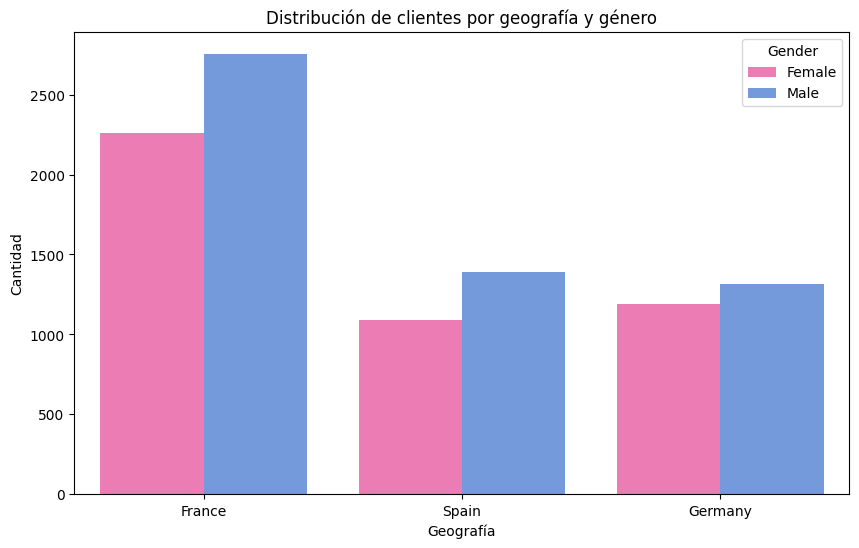

In [440]:
colors = {"Male": "#6495ED", "Female": "#FF69B4"}

# Crear el gráfico con colores personalizados
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Gender', data=abandono, palette=colors)
plt.title('Distribución de clientes por geografía y género')
plt.xlabel('Geografía')
plt.ylabel('Cantidad')
plt.show()

In [441]:
abandono['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

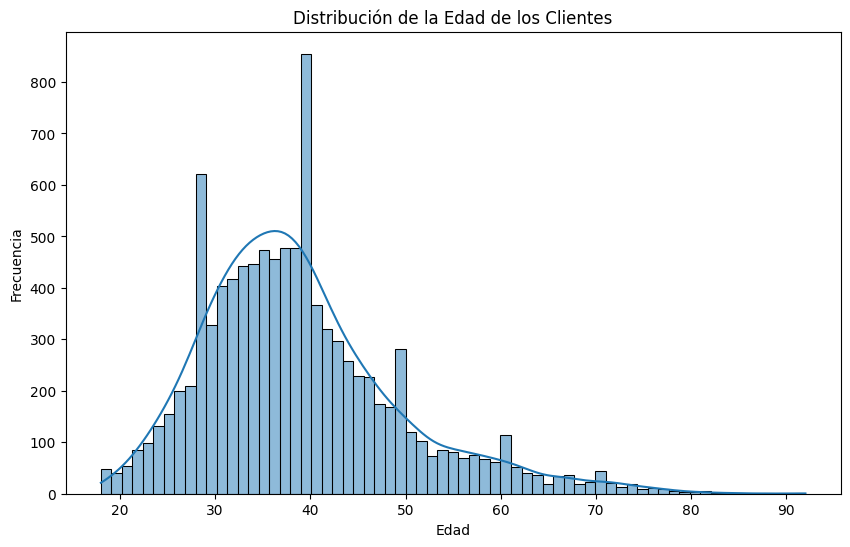

In [442]:
plt.figure(figsize=(10, 6))
sns.histplot(abandono['Age'], kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

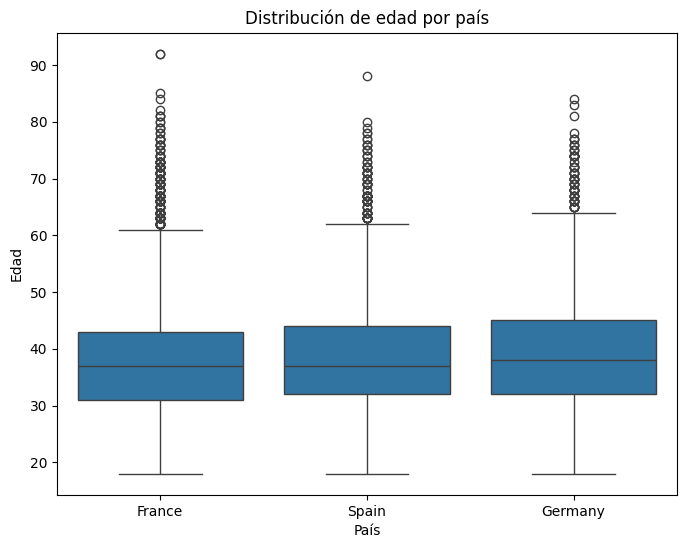

In [443]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Geography', y='Age', data=abandono)
plt.title('Distribución de edad por país')
plt.xlabel('País')
plt.ylabel('Edad')
plt.show()

C:\Users\Andrés Dardex\AppData\Local\Temp\ipykernel_23372\1944527072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=abandono, palette=colors)


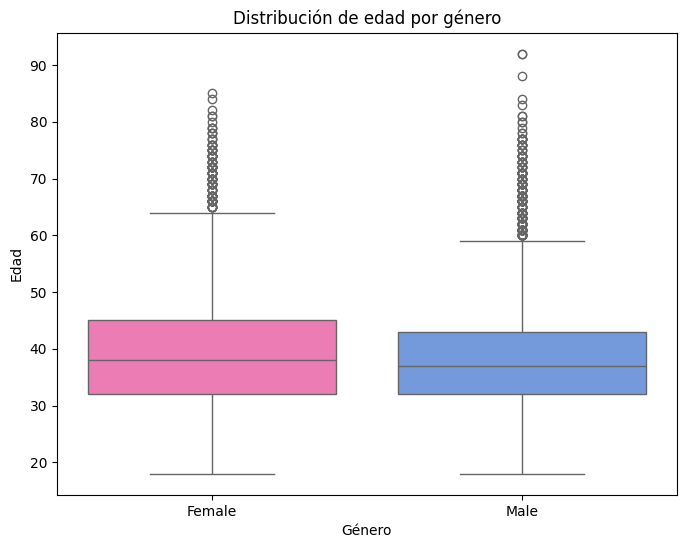

In [444]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=abandono, palette=colors)
plt.title('Distribución de edad por género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

In [445]:
abandono['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

### Datos bancarios o financieros de clientes

Datos sobre tendencias a tarjetas de credito, numero de productos, saldo, salario estimado y mas informacion relacionada con la actividad bancaria de los clientes

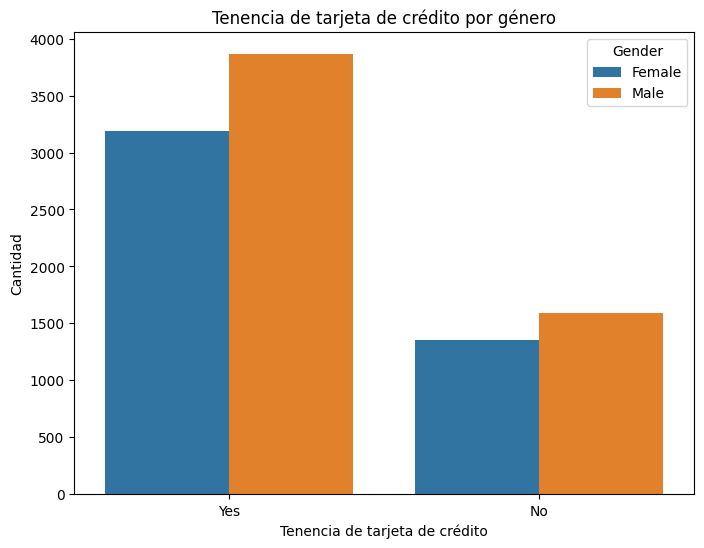

In [446]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Gender', data=abandono)
plt.title('Tenencia de tarjeta de crédito por género')
plt.xlabel('Tenencia de tarjeta de crédito')
plt.ylabel('Cantidad')
plt.show()

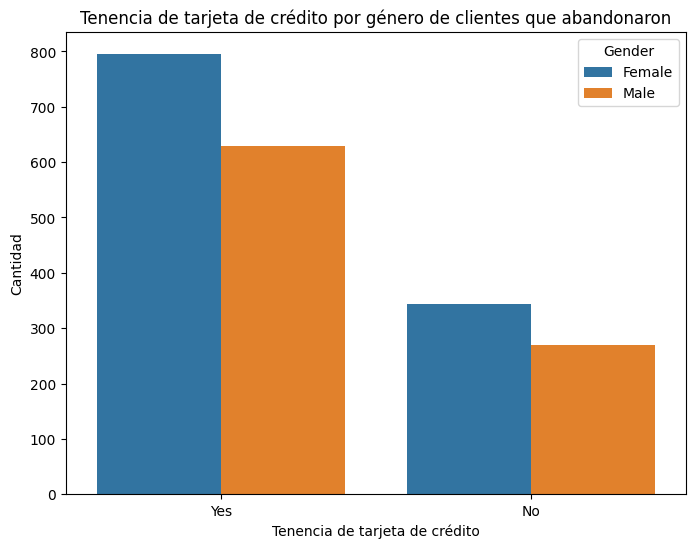

In [447]:
datos = abandono.copy()
se_van = datos[datos['Exited'] == 'Yes']
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Gender', data=se_van)
plt.title('Tenencia de tarjeta de crédito por género de clientes que abandonaron')
plt.xlabel('Tenencia de tarjeta de crédito')
plt.ylabel('Cantidad')
plt.show()

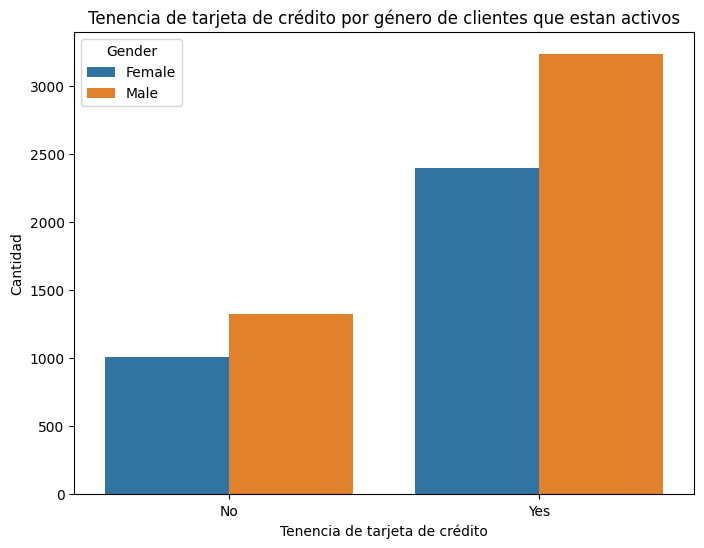

In [448]:
datos = abandono.copy()
se_mantienen = datos[datos['Exited'] == 'No']
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Gender', data=se_mantienen)
plt.title('Tenencia de tarjeta de crédito por género de clientes que estan activos')
plt.xlabel('Tenencia de tarjeta de crédito')
plt.ylabel('Cantidad')
plt.show()

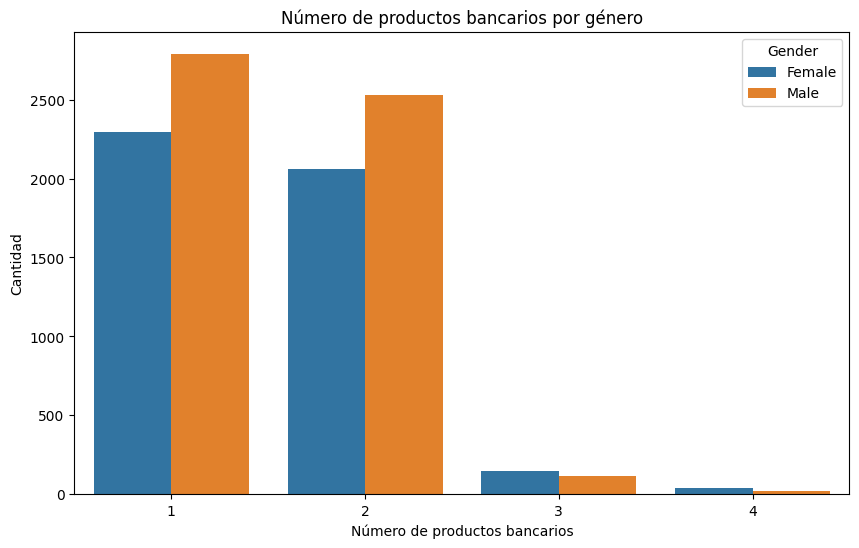

In [449]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Gender', data=abandono)
plt.title('Número de productos bancarios por género')
plt.xlabel('Número de productos bancarios')
plt.ylabel('Cantidad')
plt.show()

In [450]:
abandono['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

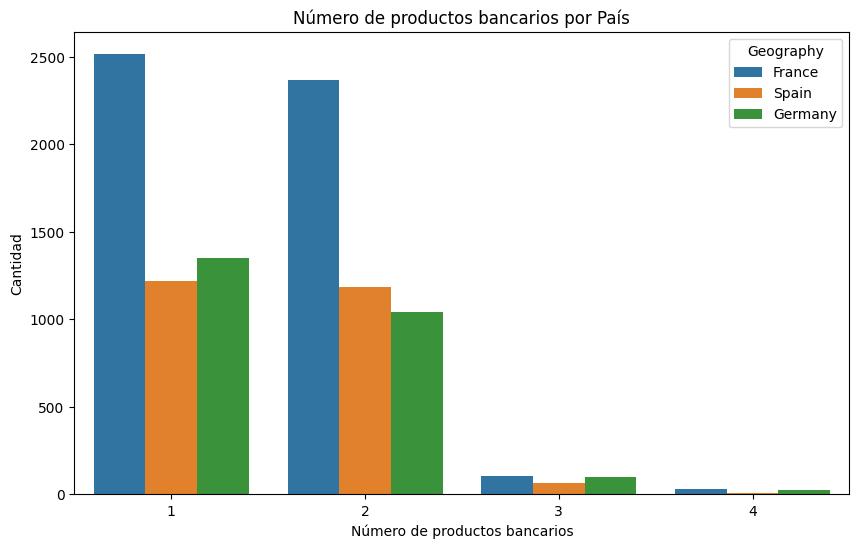

In [451]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Geography', data=abandono)
plt.title('Número de productos bancarios por País')
plt.xlabel('Número de productos bancarios')
plt.ylabel('Cantidad')
plt.show()

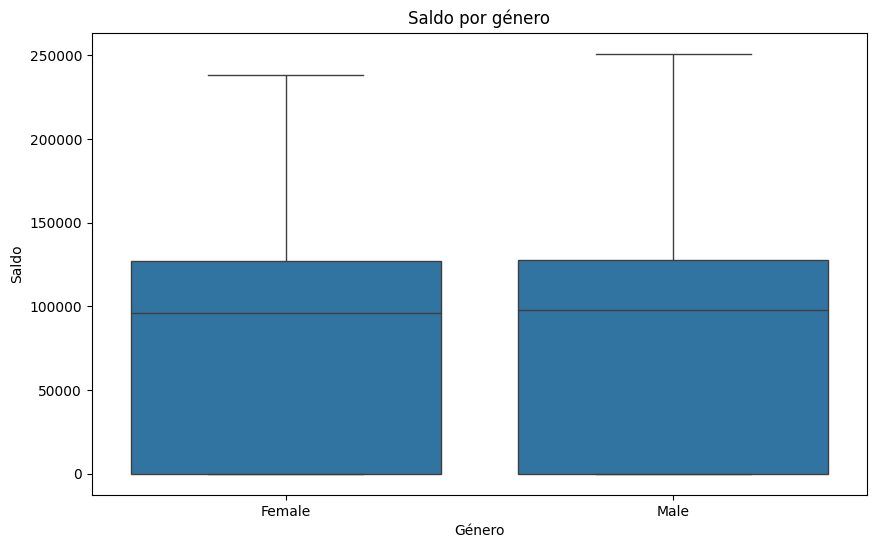

In [452]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Balance', data=abandono)
plt.title('Saldo por género')
plt.xlabel('Género')
plt.ylabel('Saldo')
plt.show()

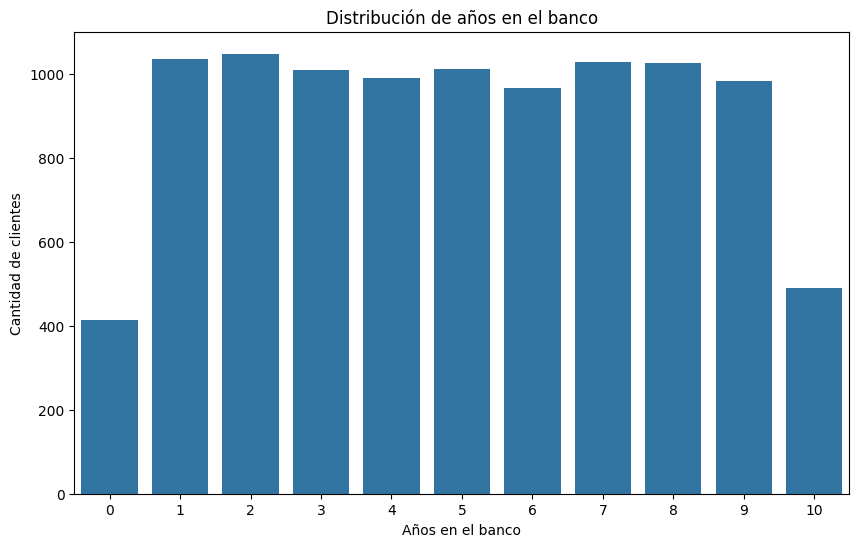

In [453]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=abandono)
plt.title('Distribución de años en el banco')
plt.xlabel('Años en el banco')
plt.ylabel('Cantidad de clientes')
plt.show()

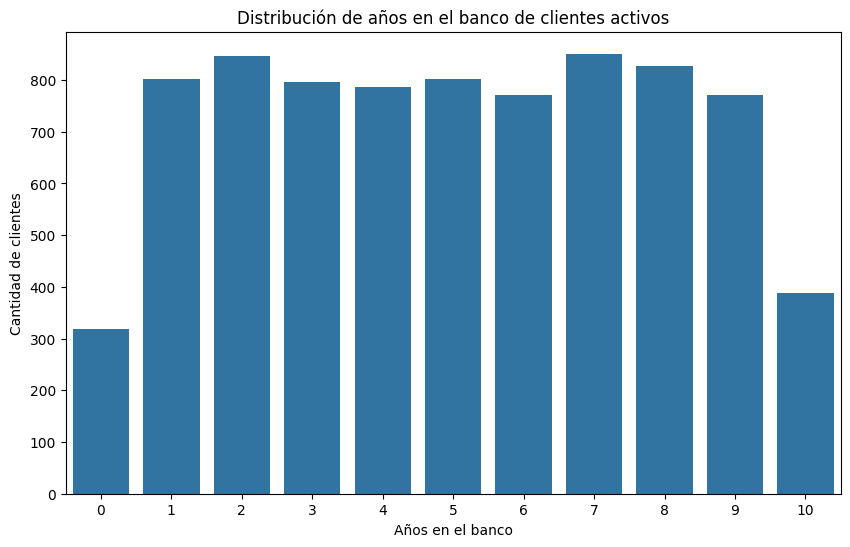

In [454]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=se_mantienen)
plt.title('Distribución de años en el banco de clientes activos')
plt.xlabel('Años en el banco')
plt.ylabel('Cantidad de clientes')
plt.show()

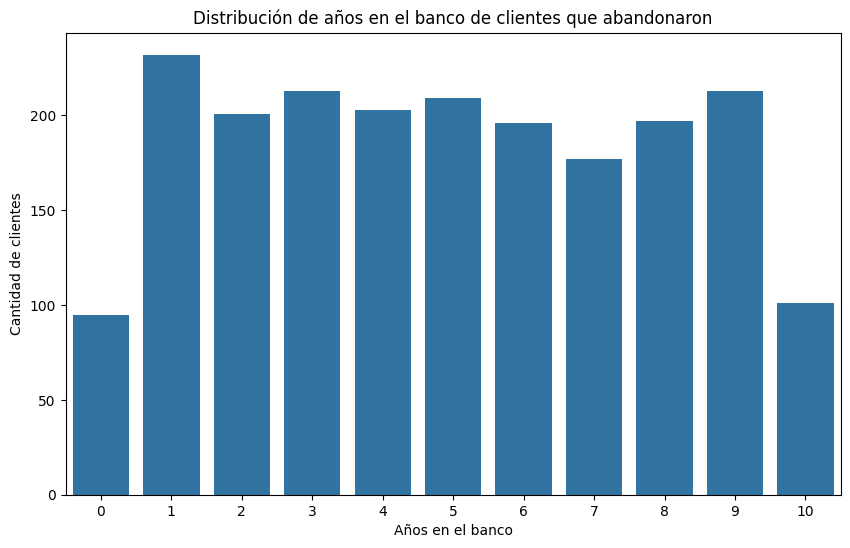

In [455]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=se_van)
plt.title('Distribución de años en el banco de clientes que abandonaron')
plt.xlabel('Años en el banco')
plt.ylabel('Cantidad de clientes')
plt.show()

In [456]:
abandono['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

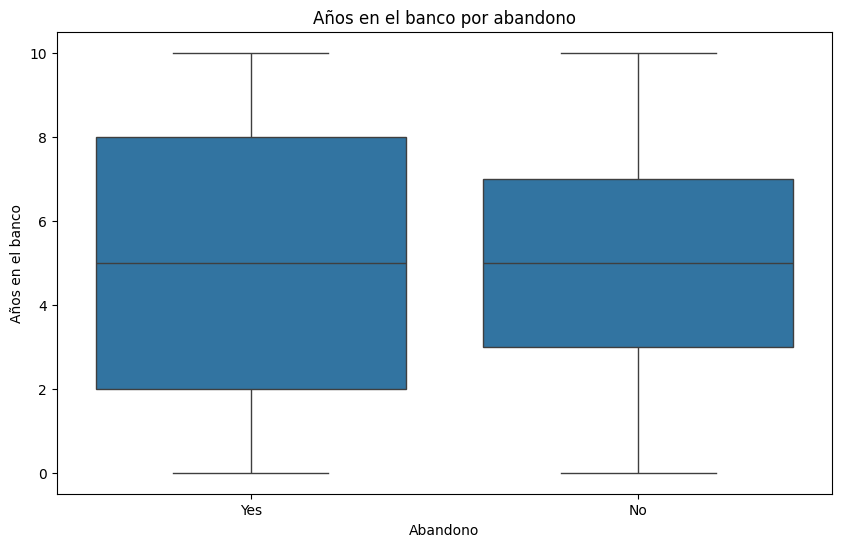

In [457]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=abandono)
plt.title('Años en el banco por abandono')
plt.xlabel('Abandono')
plt.ylabel('Años en el banco')
plt.show()

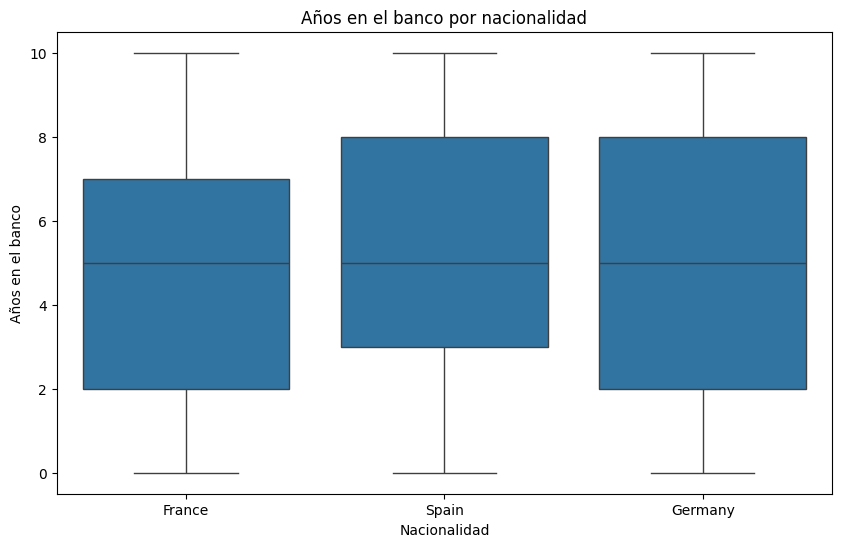

In [458]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='Tenure', data=abandono)
plt.title('Años en el banco por nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Años en el banco')
plt.show()

### Datos de abandono y permanencia

aca se analizara la cantidad de clientes que han abandonado el banco y los que se han quedado si sus relaciones con los datos bancarios o demograficos.

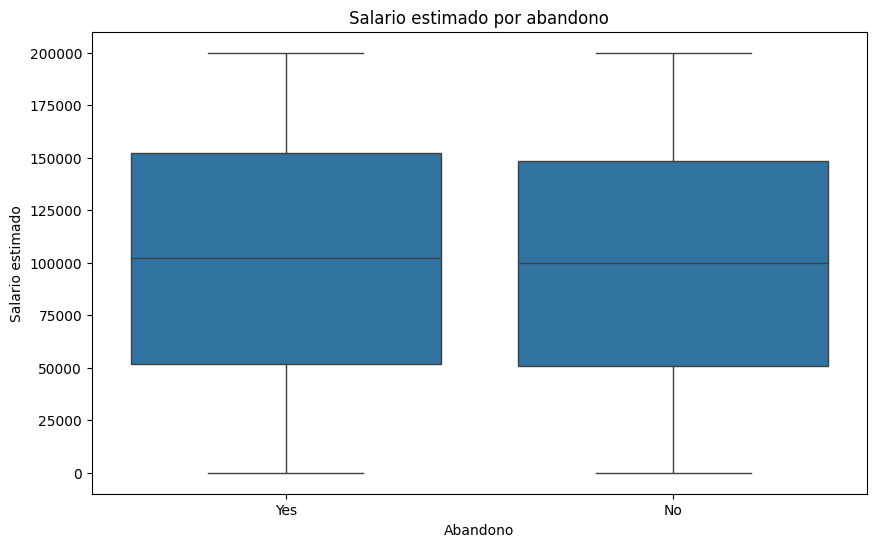

In [459]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=abandono)
plt.title('Salario estimado por abandono')
plt.xlabel('Abandono')
plt.ylabel('Salario estimado')
plt.show()

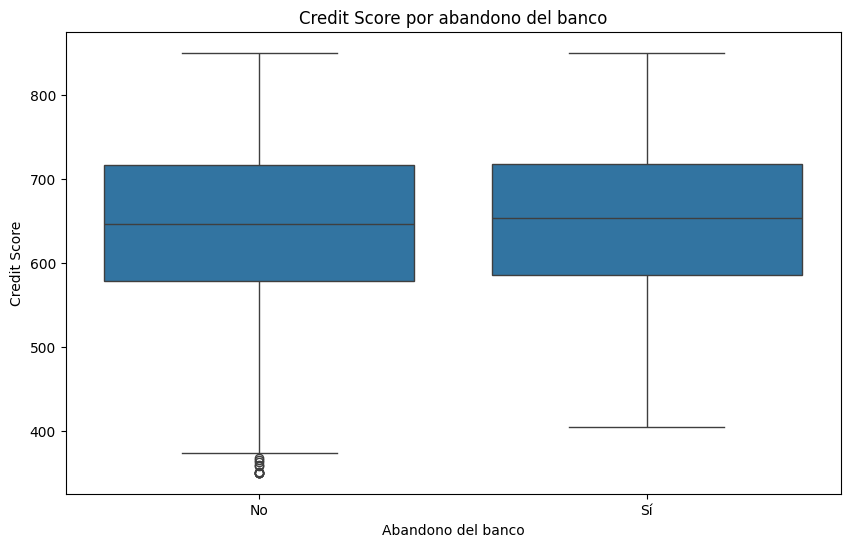

In [460]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=abandono)
plt.title('Credit Score por abandono del banco')
plt.xlabel('Abandono del banco')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

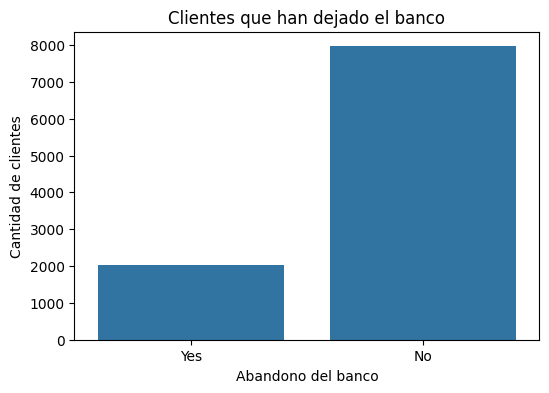

In [461]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=abandono)
plt.title('Clientes que han dejado el banco')
plt.xlabel('Abandono del banco')
plt.ylabel('Cantidad de clientes')
plt.show()

In [462]:
abandono['Exited'].value_counts()

Exited
No     7963
Yes    2037
Name: count, dtype: int64

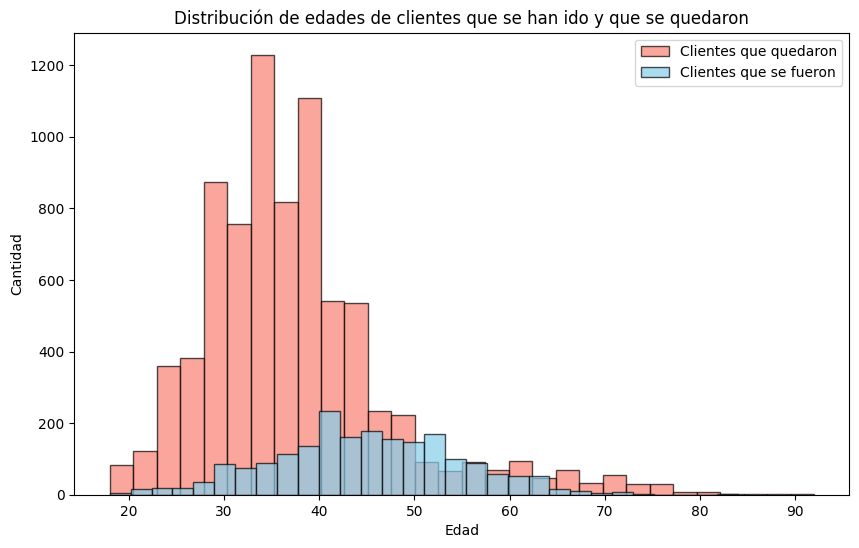

In [463]:
quedaron = abandono[abandono['Exited'] == 'No']
abandonaron = abandono[abandono['Exited'] == 'Yes']
plt.figure(figsize=(10, 6))
plt.hist(quedaron['Age'], bins=30, color='salmon', edgecolor='black', alpha=0.7, label='Clientes que quedaron')
plt.hist(abandonaron['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Clientes que se fueron')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de edades de clientes que se han ido y que se quedaron')
plt.legend()
plt.show()


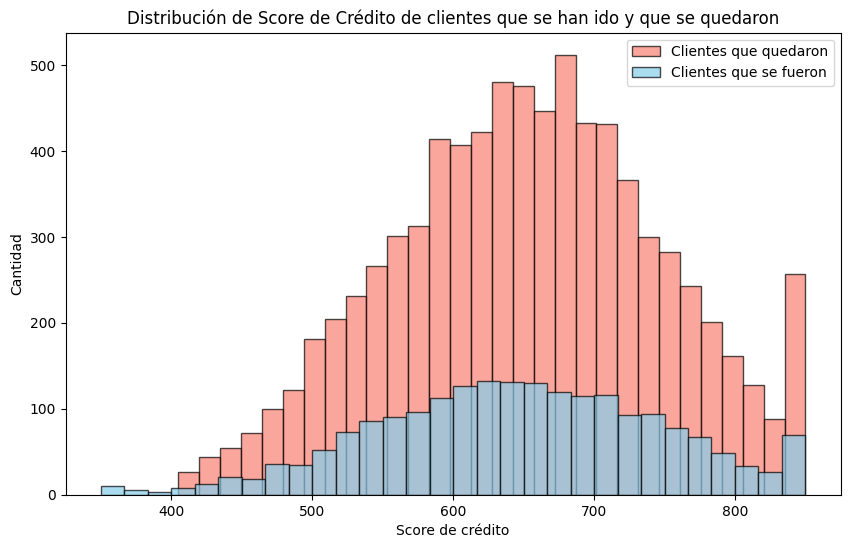

In [464]:
quedaron = abandono[abandono['Exited'] == 'No']
abandonaron = abandono[abandono['Exited'] == 'Yes']
plt.figure(figsize=(10, 6))
plt.hist(quedaron['CreditScore'], bins=30, color='salmon', edgecolor='black', alpha=0.7, label='Clientes que quedaron')
plt.hist(abandonaron['CreditScore'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Clientes que se fueron')
plt.xlabel('Score de crédito')
plt.ylabel('Cantidad')
plt.title('Distribución de Score de Crédito de clientes que se han ido y que se quedaron')
plt.legend()
plt.show()

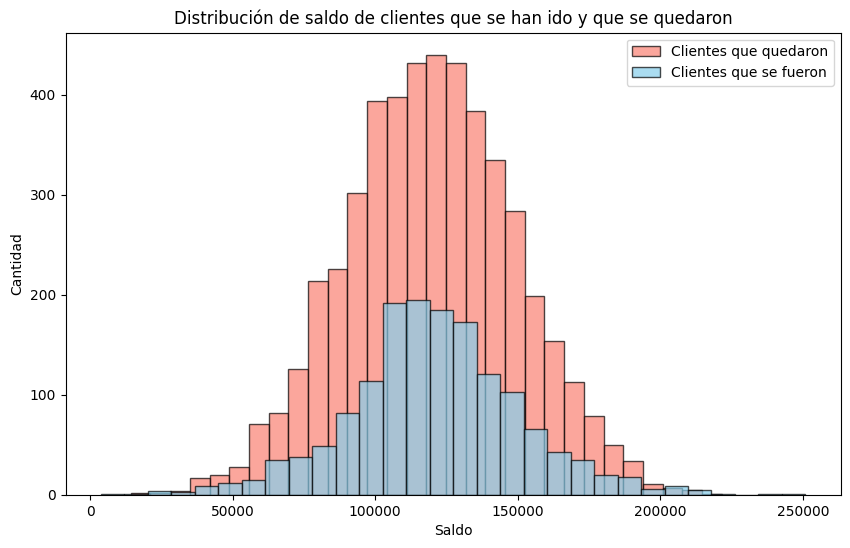

In [465]:
abandono2 = abandono.copy()
abandono2 = abandono2[abandono2['Balance'] != 0]
quedaron = abandono2[abandono2['Exited'] == 'No']
abandonaron = abandono2[abandono2['Exited'] == 'Yes']
plt.figure(figsize=(10, 6))
plt.hist(quedaron['Balance'], bins=30, color='salmon', edgecolor='black', alpha=0.7, label='Clientes que quedaron')
plt.hist(abandonaron['Balance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Clientes que se fueron')
plt.xlabel('Saldo')
plt.ylabel('Cantidad')
plt.title('Distribución de saldo de clientes que se han ido y que se quedaron')
plt.legend()
plt.show()

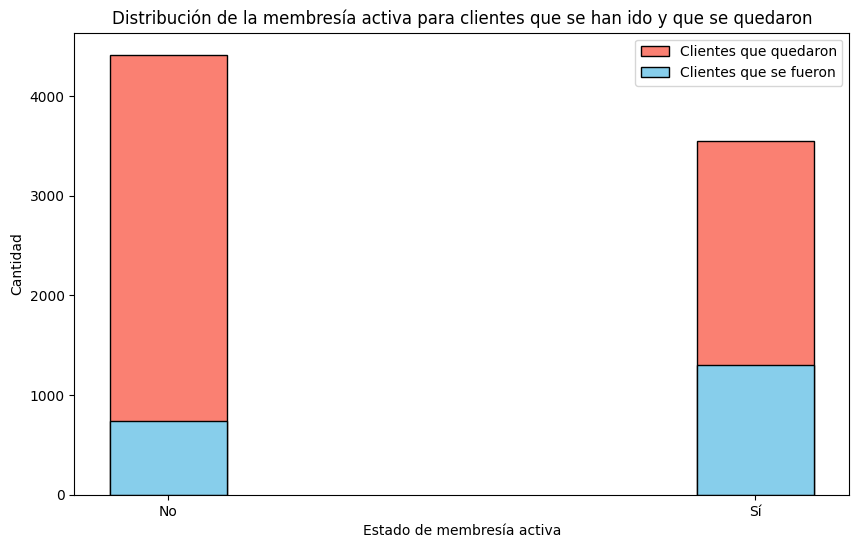

In [466]:
import matplotlib.pyplot as plt

# Filtrando los datos
quedaron = abandono[abandono['Exited'] == 'No']
abandonaron = abandono[abandono['Exited'] == 'Yes']

# Contando la cantidad de clientes que se quedaron y se fueron para cada categoría de IsActiveMember
quedaron_counts = quedaron['IsActiveMember'].value_counts()
abandonaron_counts = abandonaron['IsActiveMember'].value_counts()

# Creando la figura con tamaño personalizado
plt.figure(figsize=(10, 6))

# Creando los diagramas de barras
plt.bar(quedaron_counts.index , quedaron_counts.values, color='salmon', width=0.2, edgecolor='black', label='Clientes que quedaron')
plt.bar(abandonaron_counts.index, abandonaron_counts.values, color='skyblue', width=0.2, edgecolor='black', label='Clientes que se fueron')

# Añadiendo etiquetas y título
plt.xlabel('Estado de membresía activa')
plt.ylabel('Cantidad')
plt.title('Distribución de la membresía activa para clientes que se han ido y que se quedaron')
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas en el eje x para representar 'No' y 'Sí'
plt.legend()

# Mostrando la gráfica
plt.show()


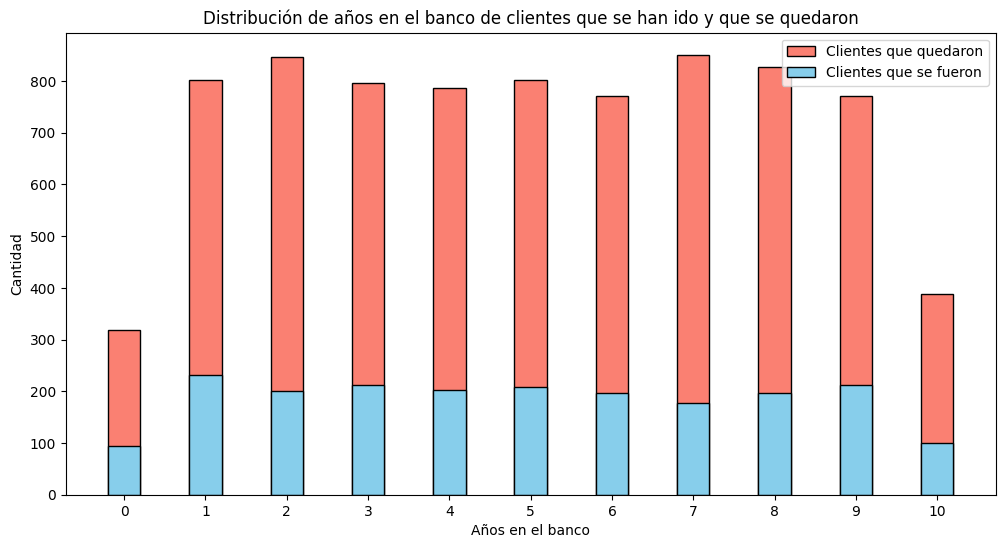

In [467]:
quedaron = abandono[abandono['Exited'] == 'No']
abandonaron = abandono[abandono['Exited'] == 'Yes']

# Contamos la cantidad de clientes en cada grupo por cada año de tenure
quedaron_counts = quedaron['Tenure'].value_counts().sort_index()
abandonaron_counts = abandonaron['Tenure'].value_counts().sort_index()

# Creamos un rango de años desde el mínimo al máximo tenure
rango_anios = range(abandono['Tenure'].min(), abandono['Tenure'].max() + 1)

plt.figure(figsize=(12, 6))

# Diagrama de barras para clientes que se quedaron
plt.bar(quedaron_counts.index, quedaron_counts.values, width=0.4, color='salmon', edgecolor='black', label='Clientes que quedaron')

# Diagrama de barras para clientes que se fueron
plt.bar(abandonaron_counts.index, abandonaron_counts.values, width=0.4, color='skyblue', edgecolor='black', label='Clientes que se fueron')

plt.xticks(rango_anios)  # Establecemos los ticks del eje x para que muestren todos los años
plt.xlabel('Años en el banco')
plt.ylabel('Cantidad')
plt.title('Distribución de años en el banco de clientes que se han ido y que se quedaron')
plt.legend()
plt.show()

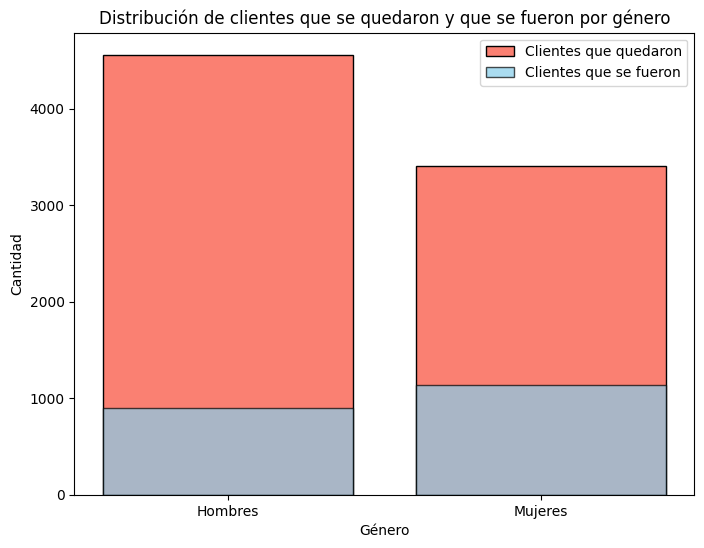

In [468]:
quedaron_hombres = abandono[(abandono['Exited'] == 'No') & (abandono['Gender'] == 'Male')]
quedaron_mujeres = abandono[(abandono['Exited'] == 'No') & (abandono['Gender'] == 'Female')]
abandonaron_hombres = abandono[(abandono['Exited'] == 'Yes') & (abandono['Gender'] == 'Male')]
abandonaron_mujeres = abandono[(abandono['Exited'] == 'Yes') & (abandono['Gender'] == 'Female')]

# Contamos la cantidad de clientes en cada grupo
quedaron_counts = [len(quedaron_hombres), len(quedaron_mujeres)]
abandonaron_counts = [len(abandonaron_hombres), len(abandonaron_mujeres)]

# Etiquetas para las barras
generos = ['Hombres', 'Mujeres']

plt.figure(figsize=(8, 6))

# Diagrama de barras para clientes que se quedaron
plt.bar(generos, quedaron_counts, color='salmon', edgecolor='black', label='Clientes que quedaron')

# Diagrama de barras para clientes que se fueron
plt.bar(generos, abandonaron_counts, color='skyblue', edgecolor='black', label='Clientes que se fueron', alpha=0.7)

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de clientes que se quedaron y que se fueron por género')
plt.legend()
plt.show()

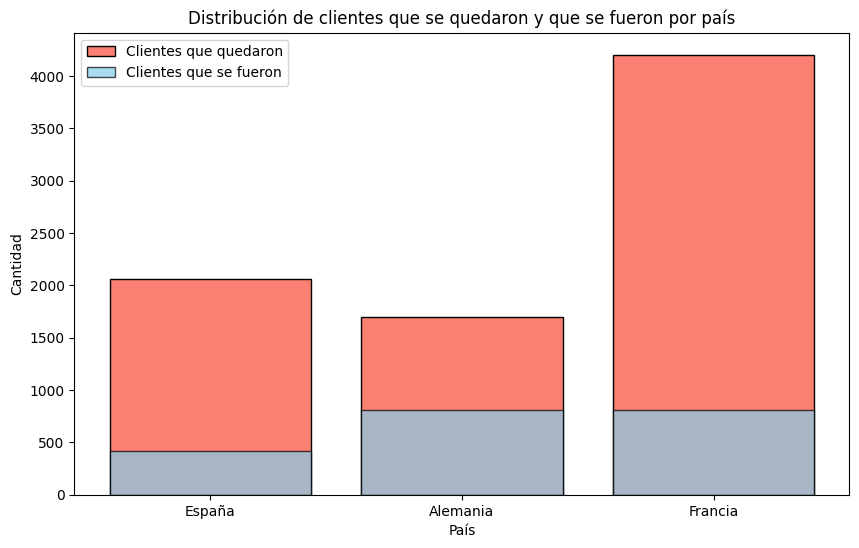

In [527]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'abandono' es tu DataFrame

# Filtramos los datos por país y estado de salida ('Exited')
quedaron_espana = abandono[(abandono['Exited'] == 'No') & (abandono['Geography'] == 'Spain')]
quedaron_alemania = abandono[(abandono['Exited'] == 'No') & (abandono['Geography'] == 'Germany')]
quedaron_francia = abandono[(abandono['Exited'] == 'No') & (abandono['Geography'] == 'France')]
abandonaron_espana = abandono[(abandono['Exited'] == 'Yes') & (abandono['Geography'] == 'Spain')]
abandonaron_alemania = abandono[(abandono['Exited'] == 'Yes') & (abandono['Geography'] == 'Germany')]
abandonaron_francia = abandono[(abandono['Exited'] == 'Yes') & (abandono['Geography'] == 'France')]

# Contamos la cantidad de clientes en cada grupo por país
quedaron_counts = [len(quedaron_espana), len(quedaron_alemania), len(quedaron_francia)]
abandonaron_counts = [len(abandonaron_espana), len(abandonaron_alemania), len(abandonaron_francia)]

# Etiquetas para las barras
paises = ['España', 'Alemania', 'Francia']

plt.figure(figsize=(10, 6))

# Diagrama de barras para clientes que se quedaron
plt.bar(paises, quedaron_counts, color='salmon', edgecolor='black', label='Clientes que quedaron')

# Diagrama de barras para clientes que se fueron
plt.bar(paises, abandonaron_counts, color='skyblue', edgecolor='black', label='Clientes que se fueron', alpha=0.7)

plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de clientes que se quedaron y que se fueron por país')
plt.legend()
plt.show()


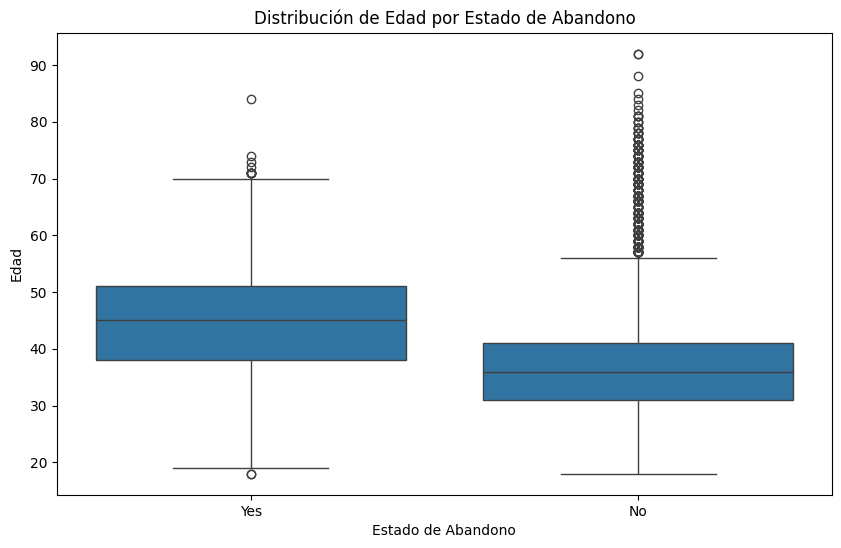

In [469]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=abandono)
plt.title('Distribución de Edad por Estado de Abandono')
plt.xlabel('Estado de Abandono')
plt.ylabel('Edad')
plt.show()

In [470]:
analisis_numerico = abandono[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Exited']]

C:\Users\Andrés Dardex\AppData\Local\Temp\ipykernel_23372\2769361079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analisis_numerico['Exited'] = (analisis_numerico['Exited'] == 'Yes').astype(int)


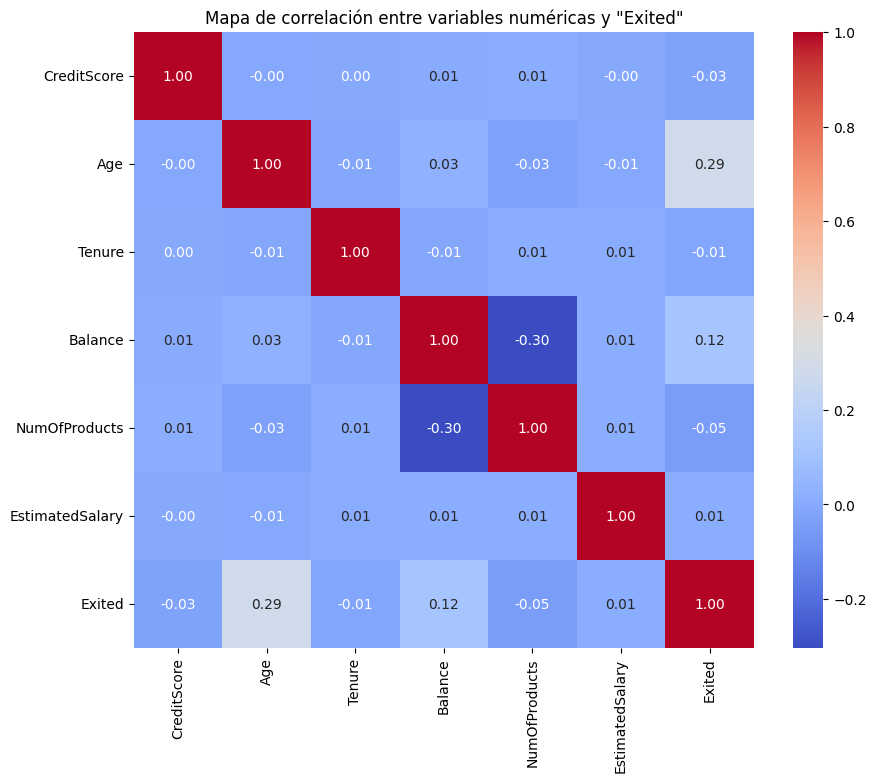

In [471]:
analisis_numerico['Exited'] = (analisis_numerico['Exited'] == 'Yes').astype(int)

# Calculamos la matriz de correlación
correlacion = analisis_numerico.corr()

# Creamos un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlación entre variables numéricas y "Exited"')
plt.show()

In [472]:
analisis_numerico.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0


In [473]:
abandonaron.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [474]:
analisis_numerico.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,199992.48,1.0


# Depositos

# Descripcion de las Columnas
- **Age**: La edad del cliente.
- **Job**: La ocupación del cliente.
- **Marital**: El estado civil del cliente.
- **Education**: El nivel educativo del cliente.
- **Default**: Indica si el cliente tiene o no créditos en mora.
- **Balance**: El saldo de la cuenta del cliente.
- **Housing**: Indica si el cliente tiene o no un préstamo de vivienda.
- **Contact**: El método utilizado para contactar al cliente (por ejemplo, teléfono, celular).
- **Day**: El día del mes en que se realizó el último contacto con los clientes.
- **Duration**: La duración (en segundos) del último contacto con los clientes durante una campaña.
- **Campaign**: Número de contactos realizados durante esta campaña para cada cliente.
- **pdays**: Número de días transcurridos desde el último contacto desde la campaña anterior.
- **previous** - Número de contactos realizados antes de esta campaña y para este cliente (numeric)
- **poutcome**: Resultado de la campaña de marketing anterior.
- **y** / **deposit** : Indica si el cliente ha suscrito un depósito a plazo.

In [475]:
depositos.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,unknown,no,05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,unknown,no,05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,unknown,no,05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,999,0,unknown,no,05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,999,0,unknown,no,05-05


### Datos demograficos

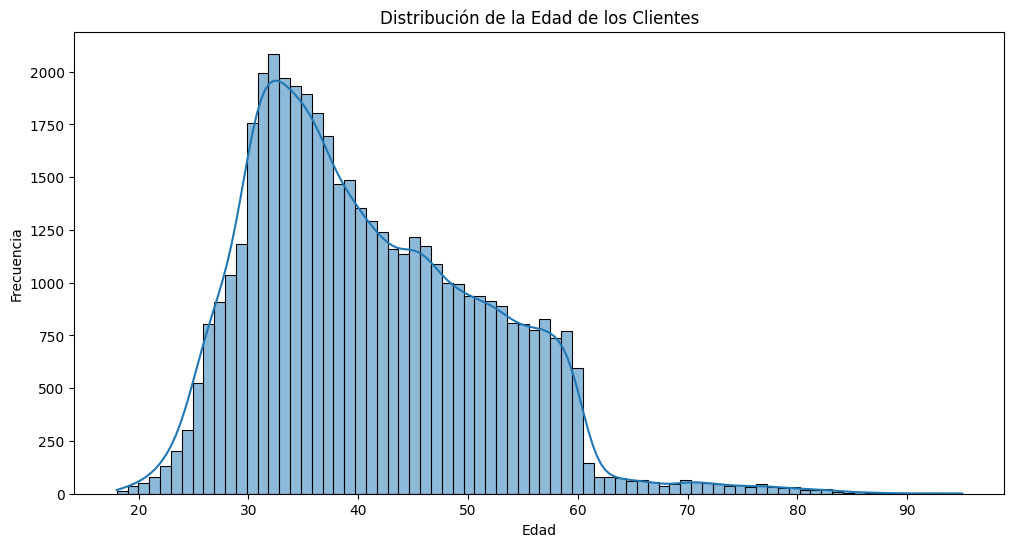

In [476]:
plt.figure(figsize=(12, 6))
sns.histplot(depositos['age'], bins=78, kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

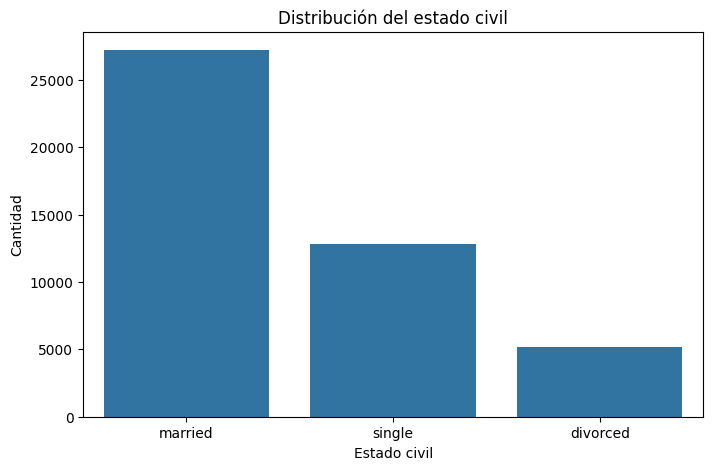

In [477]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['marital'])
plt.title('Distribución del estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad')
plt.show()

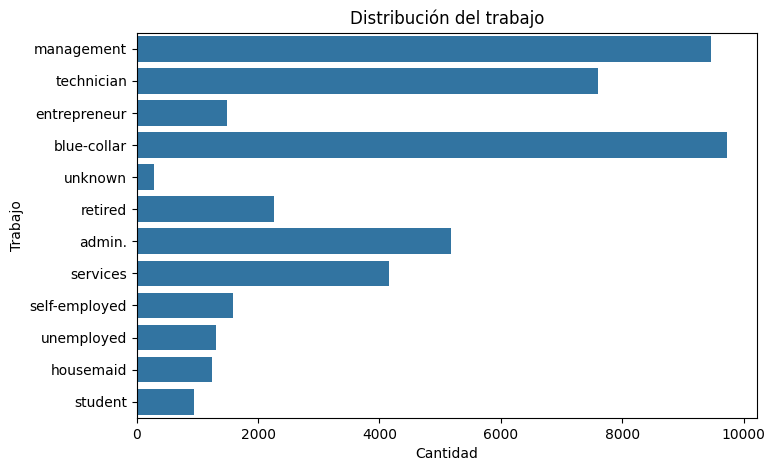

In [478]:
plt.figure(figsize=(8, 5))
sns.countplot(depositos['job'])
plt.title('Distribución del trabajo')
plt.xlabel('Cantidad')
plt.ylabel('Trabajo')
plt.show()

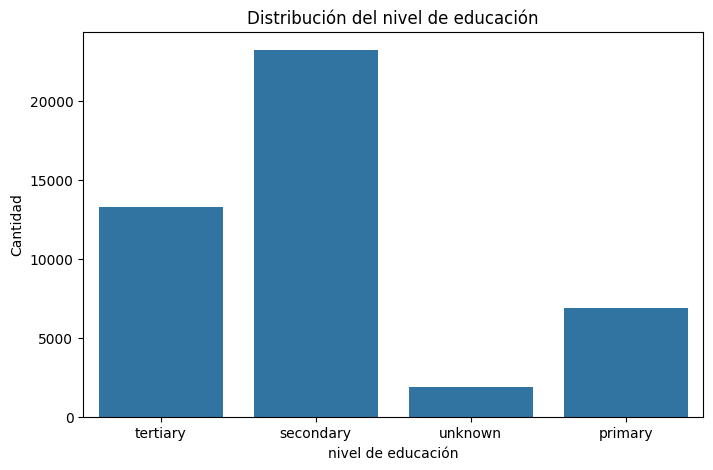

In [479]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['education'])
plt.title('Distribución del nivel de educación')
plt.xlabel('nivel de educación')
plt.ylabel('Cantidad')
plt.show()

### Datos bancarios o financieros de clientes

Se analizaran relaciones entre los datos bancarios y los datos demograficos

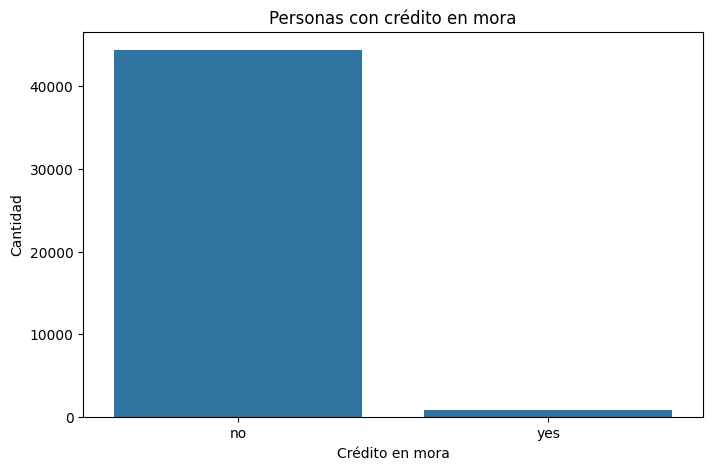

In [480]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['default'])
plt.title('Personas con crédito en mora')
plt.xlabel('Crédito en mora')
plt.ylabel('Cantidad')
plt.show()

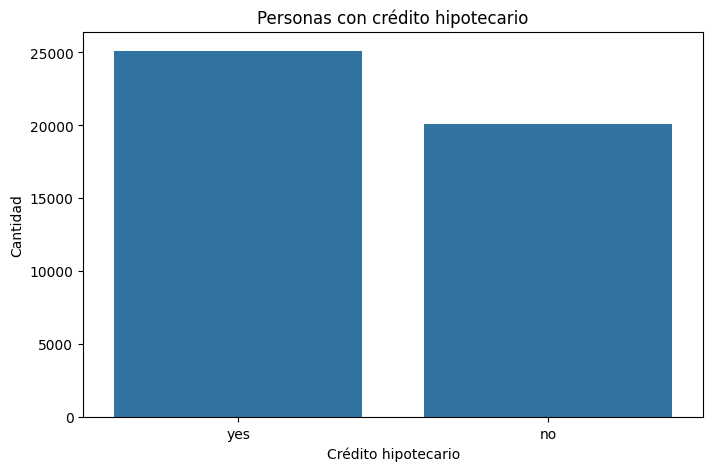

In [481]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['housing'])
plt.title('Personas con crédito hipotecario')
plt.xlabel('Crédito hipotecario')
plt.ylabel('Cantidad')
plt.show()

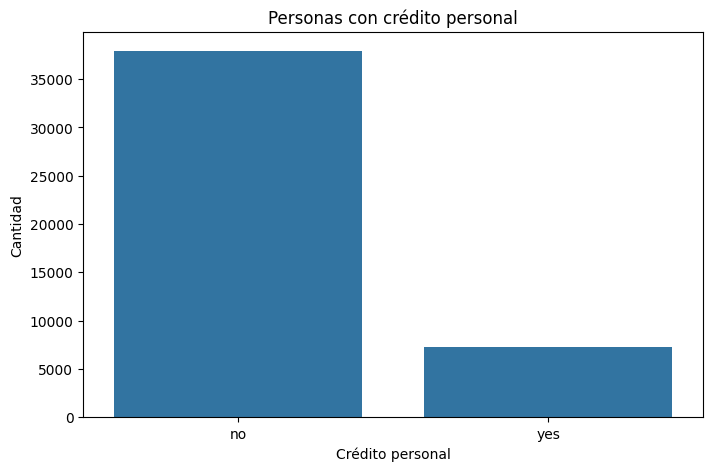

In [482]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['loan'])
plt.title('Personas con crédito personal')
plt.xlabel('Crédito personal')
plt.ylabel('Cantidad')
plt.show()

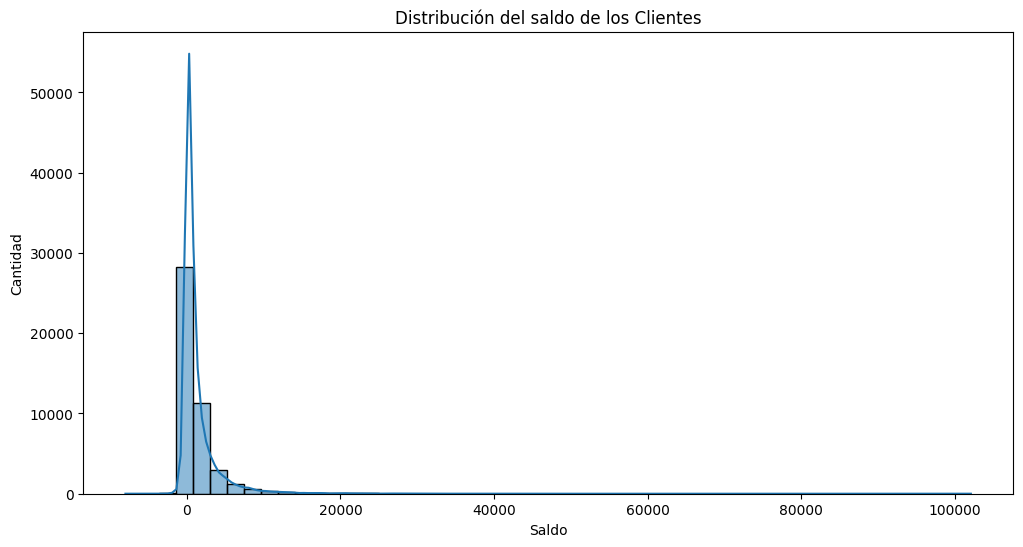

In [483]:
plt.figure(figsize=(12, 6))
sns.histplot(depositos['balance'], bins=50, kde=True)
plt.title('Distribución del saldo de los Clientes')
plt.xlabel('Saldo')
plt.ylabel('Cantidad')
plt.show()

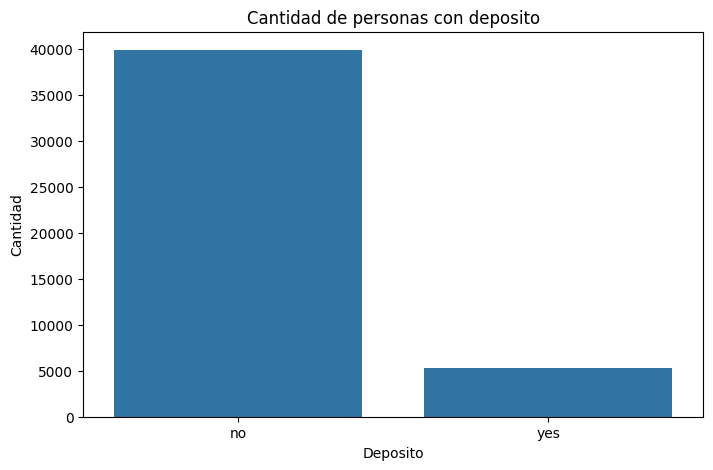

In [539]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['deposit'])
plt.title('Cantidad de personas con deposito')
plt.xlabel('Deposito')
plt.ylabel('Cantidad')
plt.show()

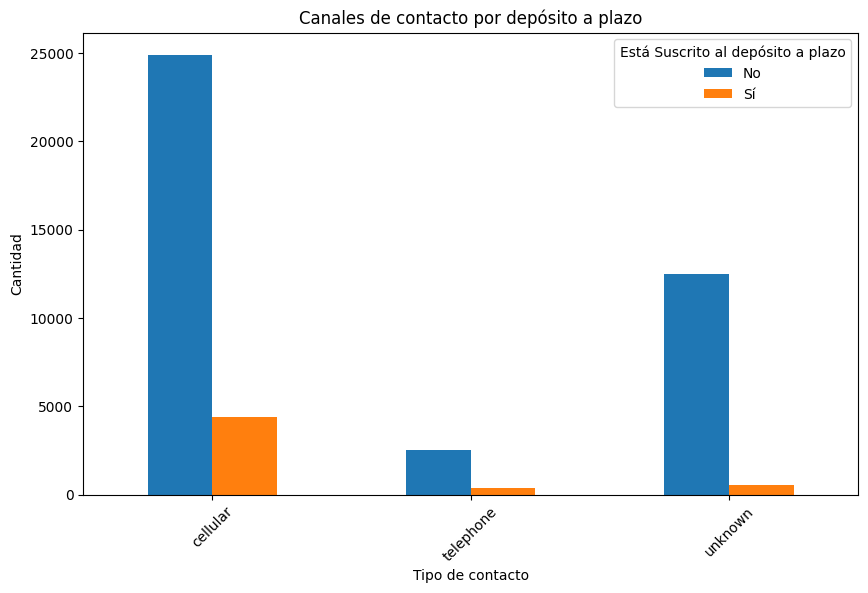

In [484]:
# Conteo de créditos ofrecidos por tipo de contacto
contact_credit_counts = depositos.groupby(['contact', 'deposit']).size().unstack()

# Crear el gráfico de barras apiladas
contact_credit_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Canales de contacto por depósito a plazo')
plt.xlabel('Tipo de contacto')
plt.ylabel('Cantidad')
plt.legend(title='Está Suscrito al depósito a plazo', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()


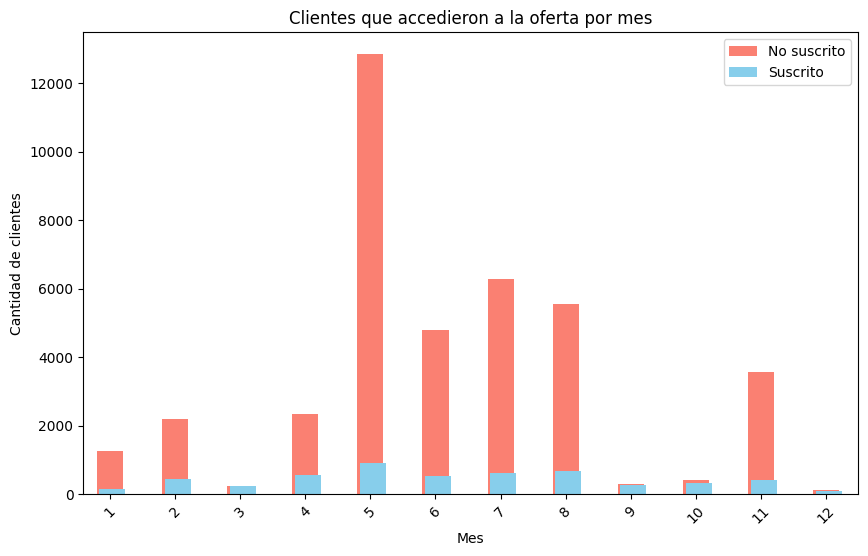

In [544]:
depositos['date'] = pd.to_datetime(depositos['date'], format='%d-%m')
subscribed_by_month = depositos[depositos['deposit'] == 'yes'].groupby(depositos['date'].dt.month).size()
un_subscribed_by_month = depositos[depositos['deposit'] == 'no'].groupby(depositos['date'].dt.month).size()
plt.figure(figsize=(10, 6))
un_subscribed_by_month.plot(kind='bar', color='salmon', label='No suscrito', width=0.4)
subscribed_by_month.plot(kind='bar', color='skyblue', label='Suscrito', width=0.4, position=0.4)
plt.title('Clientes que accedieron a la oferta por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend()
plt.show()


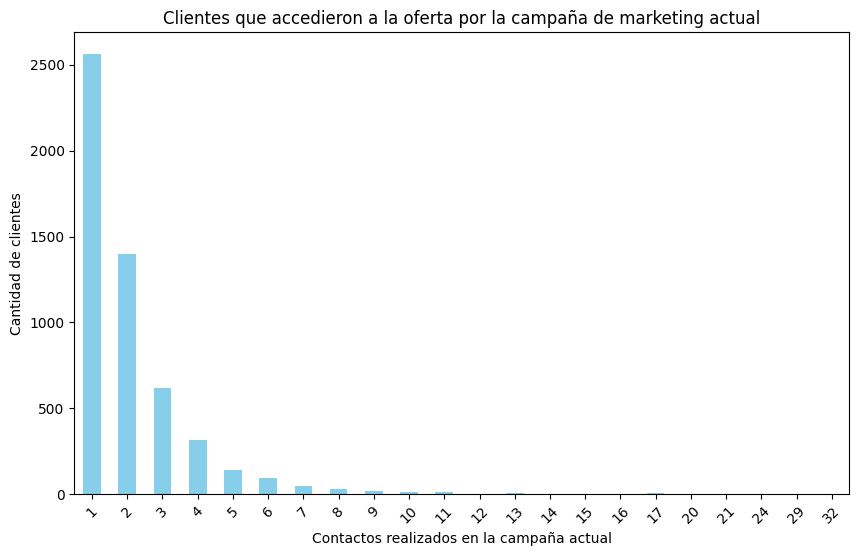

In [486]:
subscribed_by_month = depositos[depositos['deposit'] == 'yes'].groupby(depositos['campaign']).size()
subscribed_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Clientes que accedieron a la oferta por la campaña de marketing actual')
plt.xlabel('Contactos realizados en la campaña actual')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()


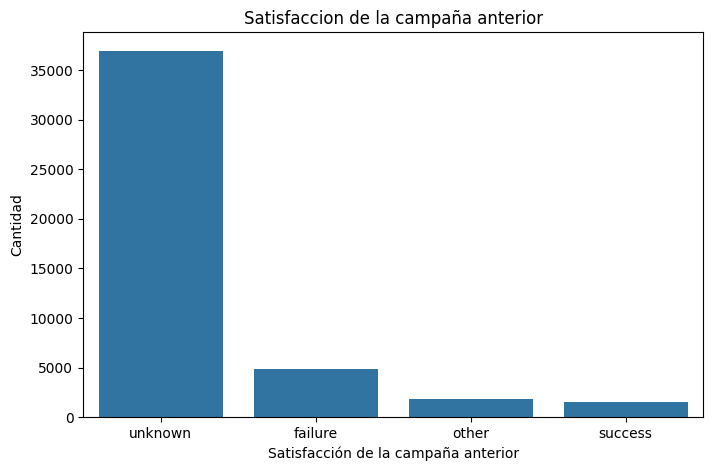

In [487]:
plt.figure(figsize=(8, 5))
sns.countplot(x=depositos['poutcome'])
plt.title('Satisfaccion de la campaña anterior')
plt.xlabel('Satisfacción de la campaña anterior')
plt.ylabel('Cantidad')
plt.show()

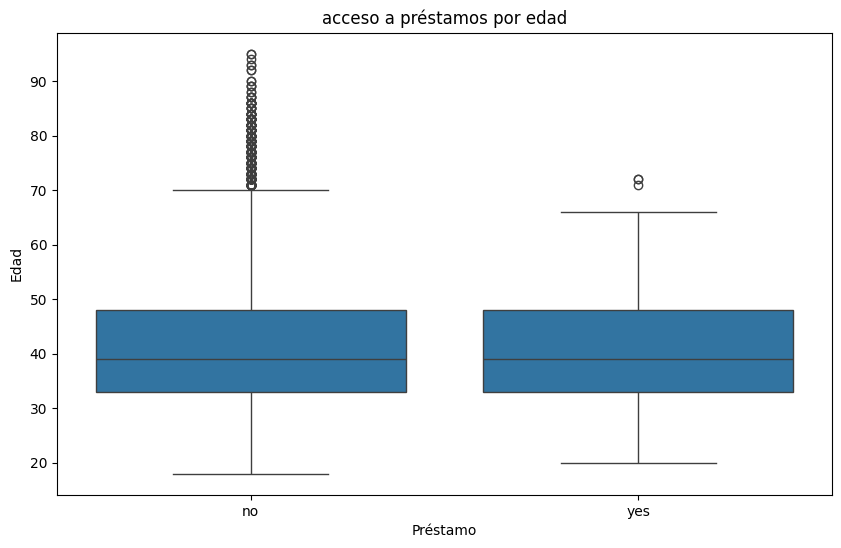

In [488]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan', y='age', data=depositos)
plt.title('acceso a préstamos por edad')
plt.ylabel('Edad')
plt.xlabel('Préstamo')
plt.show()

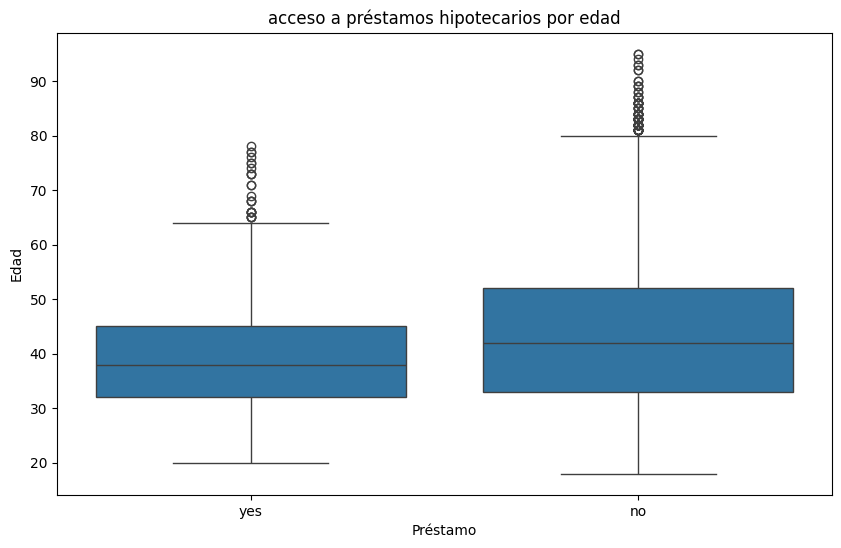

In [489]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='housing', y='age', data=depositos)
plt.title('acceso a préstamos hipotecarios por edad')
plt.ylabel('Edad')
plt.xlabel('Préstamo')
plt.show()

### Analisis de aceptacion de depositos

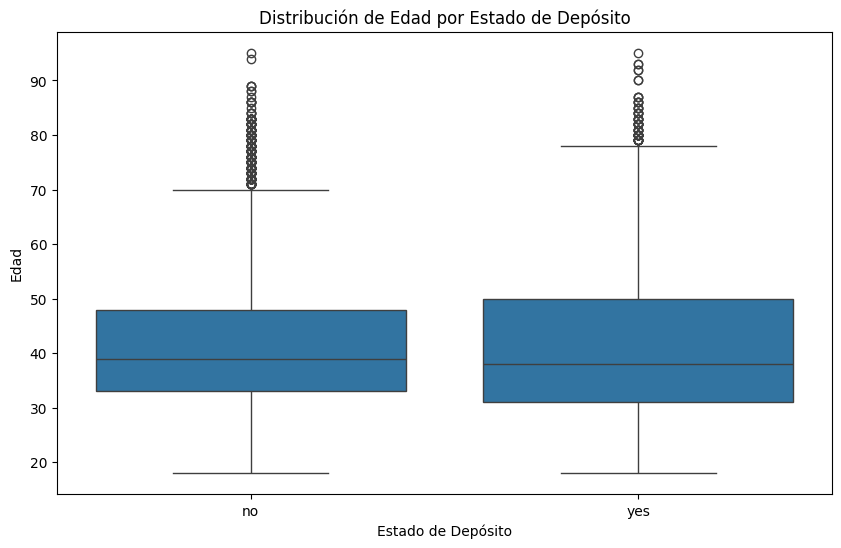

In [490]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='age', data=depositos)
plt.title('Distribución de Edad por Estado de Depósito')
plt.xlabel('Estado de Depósito')
plt.ylabel('Edad')
plt.show()

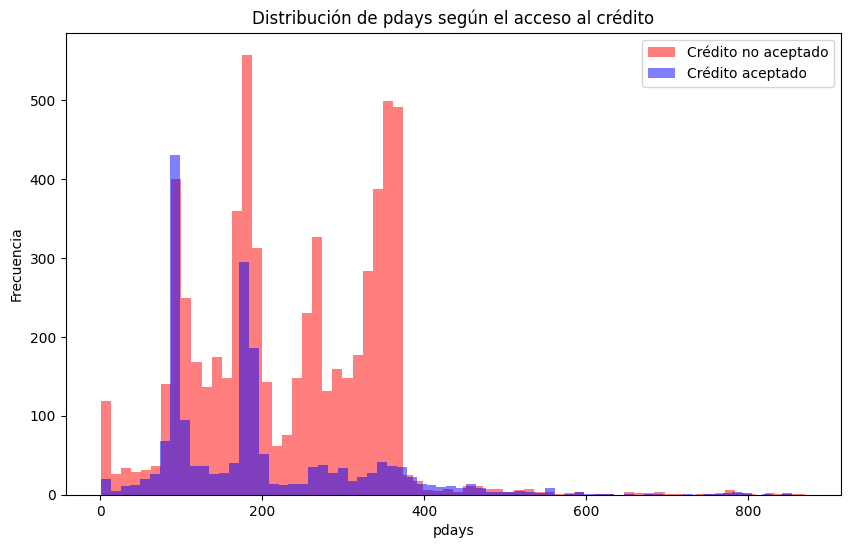

In [491]:
# Filtrar los datos excluyendo los valores de pdays iguales a -1
filtered_data = depositos[depositos['pdays'] != 999]

# Separar los datos en dos DataFrames: uno para los casos en que se ofreció el crédito y otro para los casos en que no se ofreció
credit_offered = filtered_data[filtered_data['deposit'] == 'yes']
credit_not_offered = filtered_data[filtered_data['deposit'] == 'no']

# Crear los histogramas para visualizar la distribución de pdays para cada caso
plt.figure(figsize=(10, 6))
plt.hist(credit_not_offered['pdays'], bins=70, alpha=0.5, color='red', label='Crédito no aceptado')
plt.hist(credit_offered['pdays'], bins=70, alpha=0.5, color='blue', label='Crédito aceptado')
plt.title('Distribución de pdays según el acceso al crédito')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


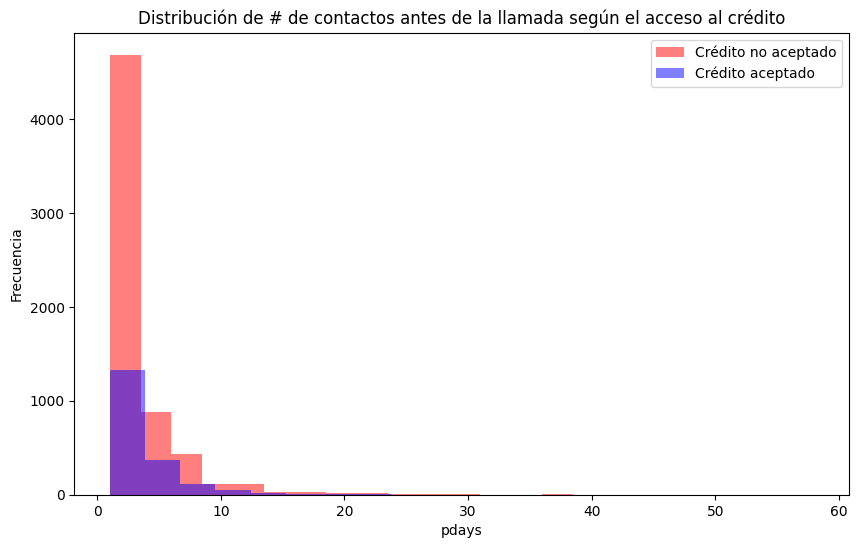

In [492]:
# Filtrar los datos excluyendo los valores de previous iguales a 0
filtered_data = depositos[depositos['previous'] != 0]

# Separar los datos en dos DataFrames: uno para los casos en que se ofreció el crédito y otro para los casos en que no se ofreció
credit_offered = filtered_data[filtered_data['deposit'] == 'yes']
credit_not_offered = filtered_data[filtered_data['deposit'] == 'no']
# Crear los histogramas para visualizar la distribución de pdays para cada caso
plt.figure(figsize=(10, 6))
plt.hist(credit_not_offered['previous'], bins=20, alpha=0.5, color='red', label='Crédito no aceptado')
plt.hist(credit_offered['previous'], bins=20, alpha=0.5, color='blue', label='Crédito aceptado')
plt.title('Distribución de # de contactos antes de la llamada según el acceso al crédito')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



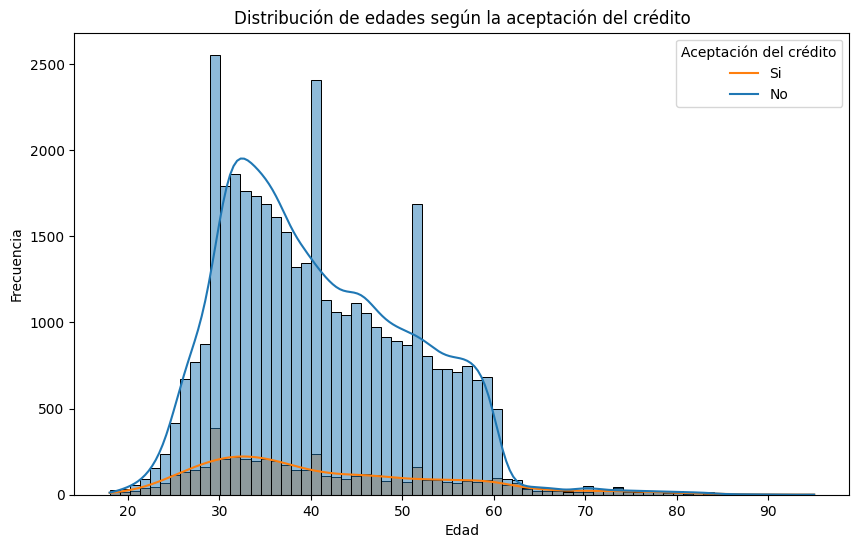

In [493]:
plt.figure(figsize=(10, 6))
sns.histplot(data=depositos,bins=70, x='age', hue='deposit', kde=True)
plt.title('Distribución de edades según la aceptación del crédito')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Aceptación del crédito', labels=['Si', 'No'])
plt.show()

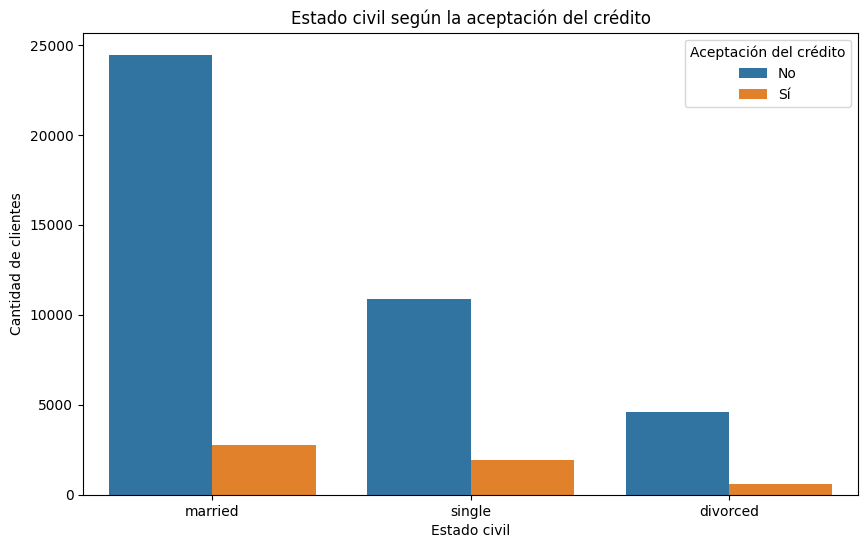

In [495]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='deposit', data=depositos)
plt.title('Estado civil según la aceptación del crédito')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Aceptación del crédito', labels=['No', 'Sí'])
plt.show()

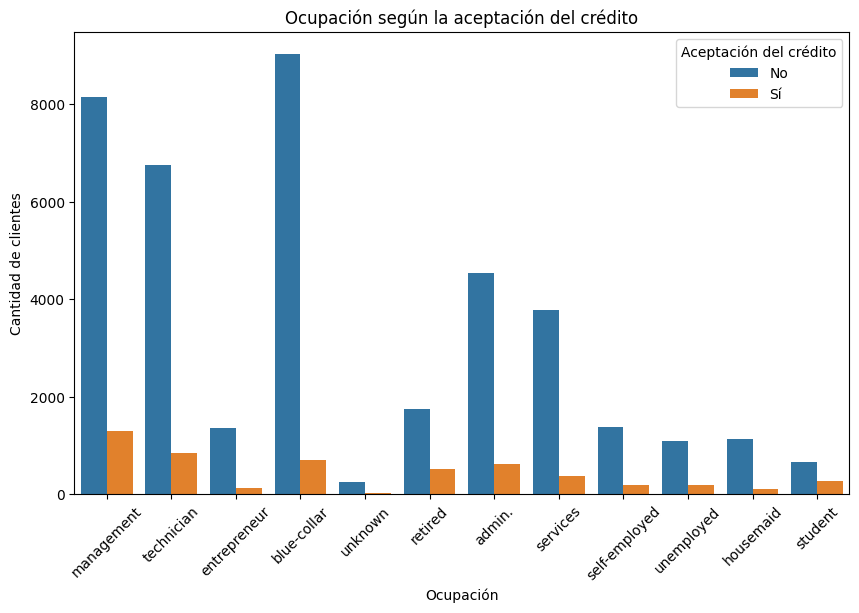

In [496]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='deposit', data=depositos)
plt.title('Ocupación según la aceptación del crédito')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Aceptación del crédito', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()


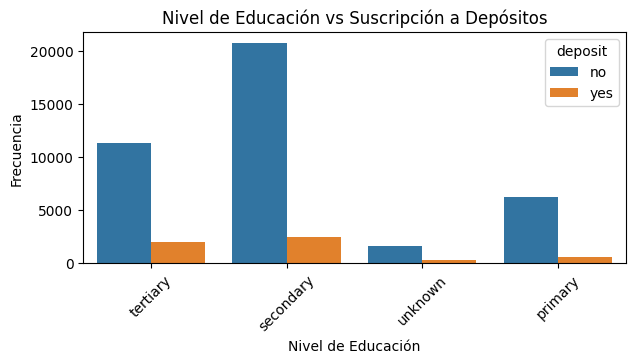

In [498]:
plt.figure(figsize=(7, 3))
sns.countplot(x='education', data=depositos, hue='deposit')
plt.title('Nivel de Educación vs Suscripción a Depósitos')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

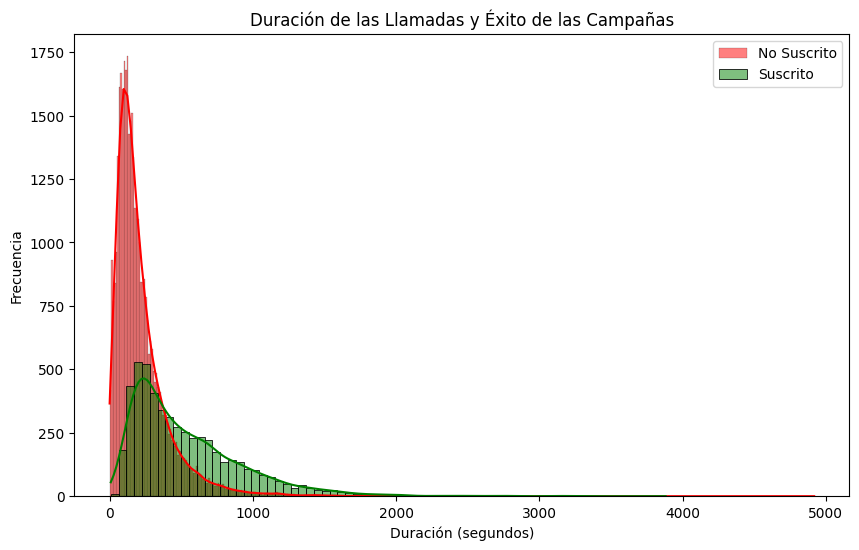

In [499]:
plt.figure(figsize=(10, 6))
sns.histplot(depositos[depositos['deposit'] == 'no']['duration'], kde=True, color='red', label='No Suscrito')
sns.histplot(depositos[depositos['deposit'] == 'yes']['duration'], kde=True, color='green', label='Suscrito')
plt.title('Duración de las Llamadas y Éxito de las Campañas')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


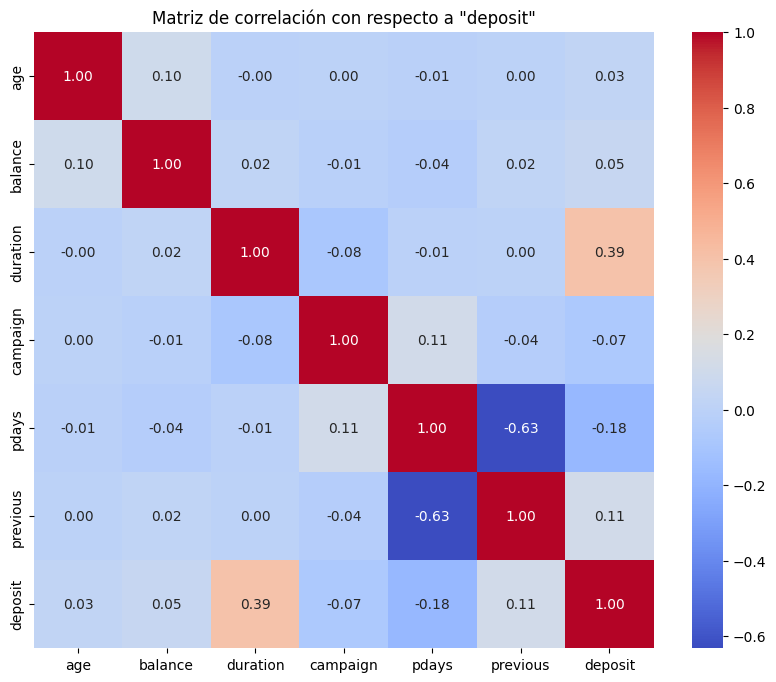

In [545]:
depositos['deposit'] = depositos['deposit'].map({'yes': 1, 'no': 0})
variables_numericas = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
analisis_numerico_depositos = depositos[variables_numericas + ['deposit']]
correlation_matrix = analisis_numerico_depositos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con respecto a "deposit"')
plt.show()


In [538]:
analisis_numerico_depositos.describe().round(2)

,age,balance,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,258.16,2.76,857.57,0.57
std,10.62,3044.77,257.53,3.10,303.25,1.91
min,18.00,-8019.00,0.00,1.00,1.00,0.00
25%,33.00,72.00,103.00,1.00,999.00,0.00
50%,39.00,448.00,180.00,2.00,999.00,0.00
75%,48.00,1428.00,319.00,3.00,999.00,0.00
max,95.00,102127.00,4918.00,63.00,999.00,58.00


# Marketing

### Variables de entrada:

#### Datos del cliente bancario:
1. **age** - Edad (numeric)
2. **job** - Tipo de trabajo (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
3. **marital** - Estado civil (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)
4. **education** - Nivel educativo (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
5. **default** - Tiene crédito en mora? (categorical: "no", "yes", "unknown")
6. **housing** - Tiene préstamo hipotecario? (categorical: "no", "yes", "unknown")
7. **loan** - Tiene préstamo personal? (categorical: "no", "yes", "unknown")

#### Relacionado con el último contacto de la campaña actual:
8. **contact** - Tipo de comunicación del contacto (categorical: "cellular", "telephone")
9. **month** - Último mes de contacto del año (categorical: "jan", "feb", "mar", …, "nov", "dec")
10. **day_of_week** - Último día de la semana de contacto (categorical: "mon", "tue", "wed", "thu", "fri")
11. **duration** - Duración del último contacto, en segundos (numeric). Nota importante: este atributo afecta significativamente el resultado de la salida (por ejemplo, si duración=0 entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después del final de la llamada, y es obviamente conocido. Por lo tanto, este dato solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

#### Otros atributos:
12. **campaign** - Número de contactos realizados durante esta campaña y para este cliente (numeric, incluye el último contacto)
13. **pdays** - Número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numeric; 999 significa que el cliente no fue contactado previamente)
14. **previous** - Número de contactos realizados antes de esta campaña y para este cliente (numeric)
15. **poutcome** - Resultado de la campaña de marketing anterior (categorical: "failure", "nonexistent", "success")

#### Atributos de contexto social y económico:
16. **emp.var.rate** - Tasa de variación del empleo - indicador trimestral (numeric)
17. **cons.price.idx** - Índice de precios al consumidor - indicador mensual (numeric)
18. **cons.conf.idx** - Índice de confianza del consumidor - indicador mensual (numeric)
19. **euribor3m** - Tasa Euribor a 3 meses - indicador diario (numeric)
20. **nr.employed** - Número de empleados - indicador trimestral (numeric)

### Variable de salida (objetivo deseado):

21. **y** - ¿El cliente ha suscrito un depósito a plazo? (binario: "yes", "no")

In [502]:
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit,month #
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5


### Datos demograficos

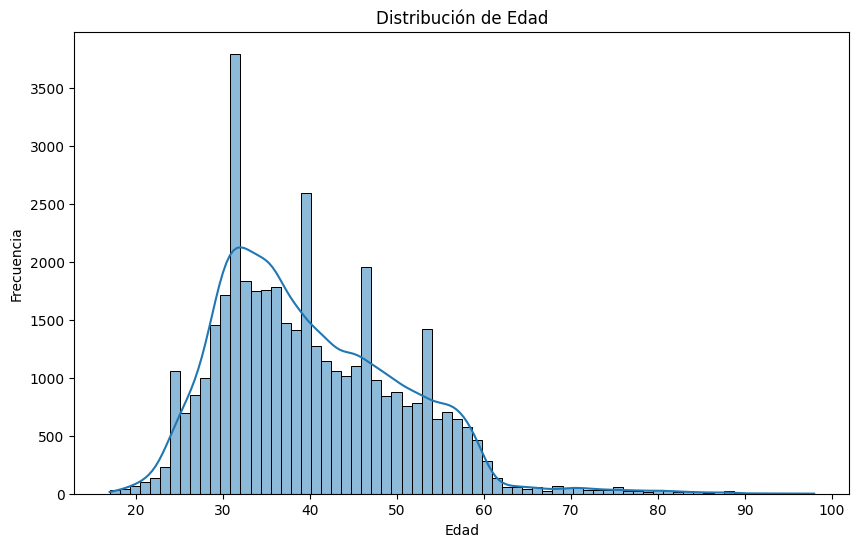

In [503]:
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='age', bins=70, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

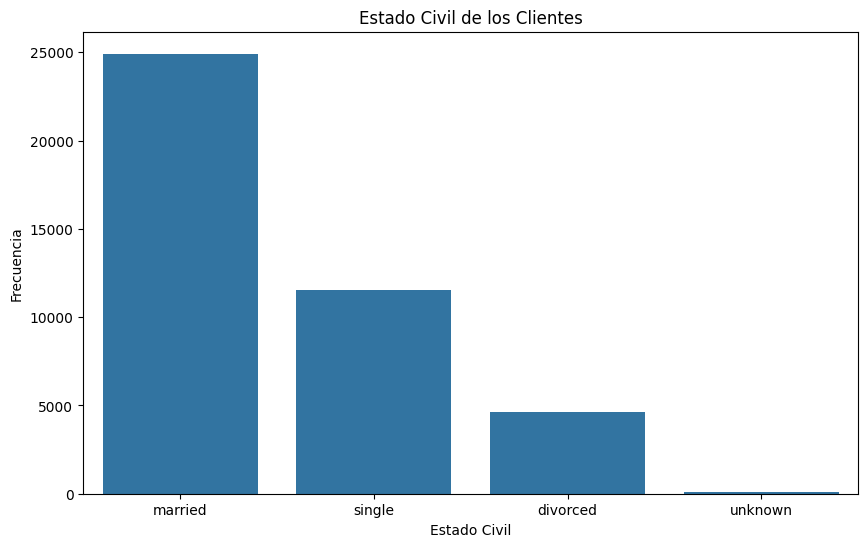

In [504]:
plt.figure(figsize=(10, 6))
sns.countplot(data=marketing, x='marital')
plt.title('Estado Civil de los Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

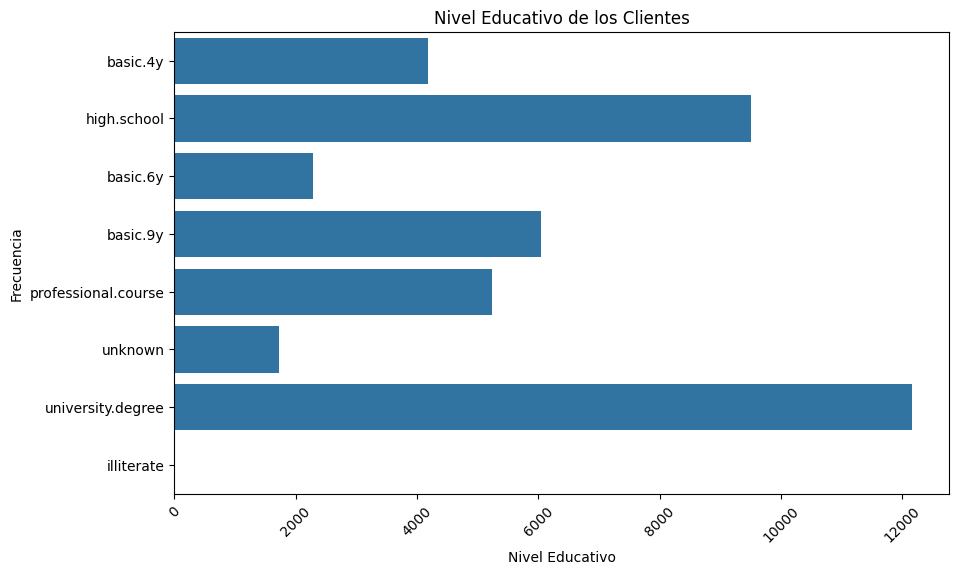

In [528]:
plt.figure(figsize=(10, 6))
sns.countplot(data=marketing, y='education')
plt.title('Nivel Educativo de los Clientes')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [506]:
marketing['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

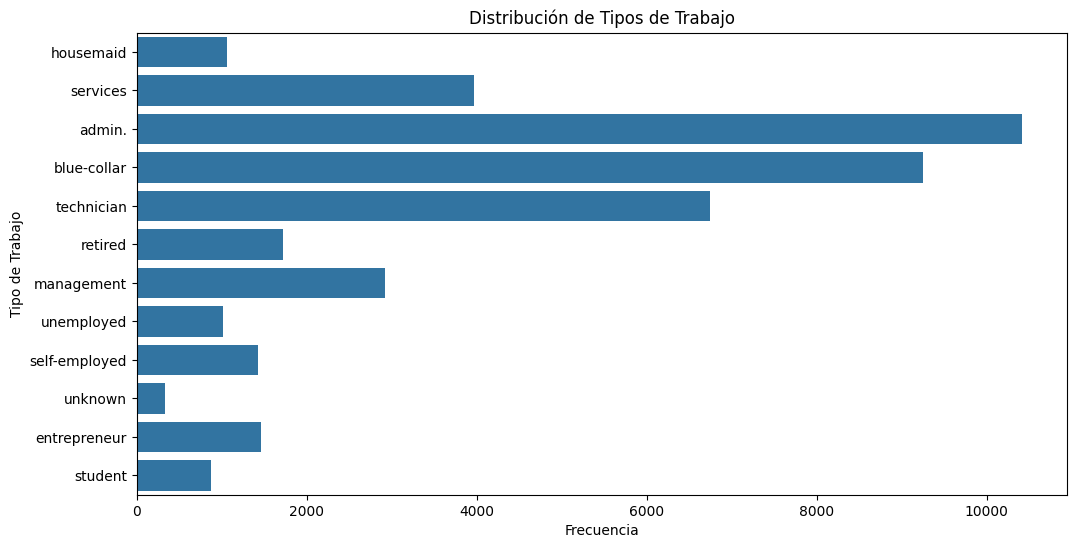

In [507]:
plt.figure(figsize=(12, 6))
sns.countplot(data=marketing, y='job')
plt.title('Distribución de Tipos de Trabajo')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Trabajo')
plt.show()

In [508]:
marketing['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

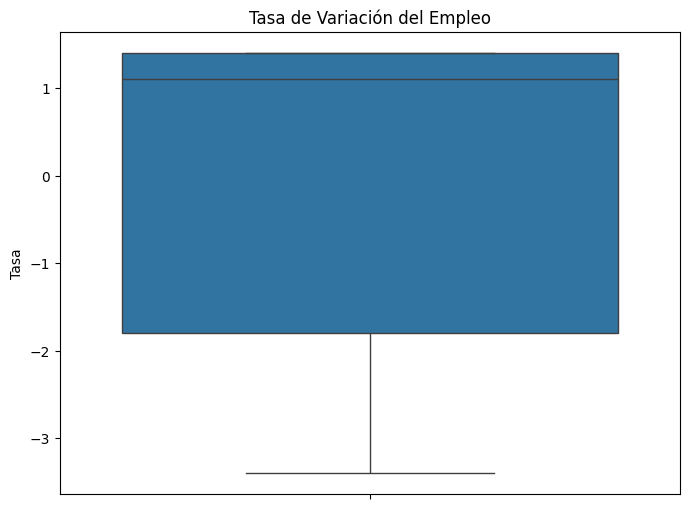

In [509]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=marketing, y='emp_var_rate')
plt.title('Tasa de Variación del Empleo')
plt.ylabel('Tasa')
plt.show()

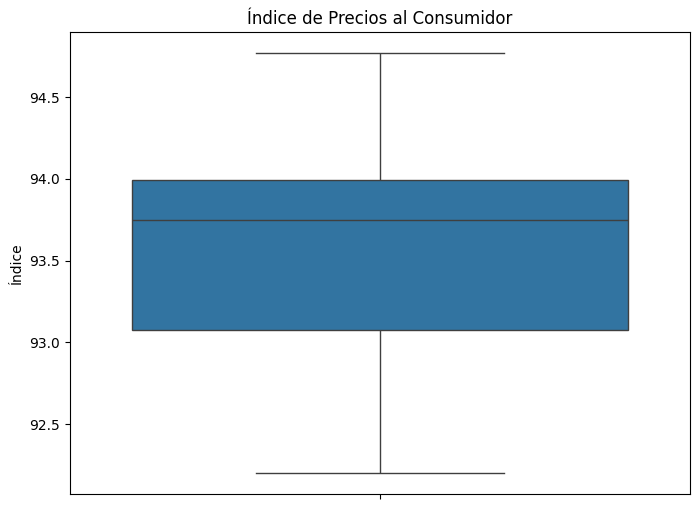

In [510]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=marketing, y='cons_price_idx')
plt.title('Índice de Precios al Consumidor')
plt.ylabel('Índice')
plt.show()

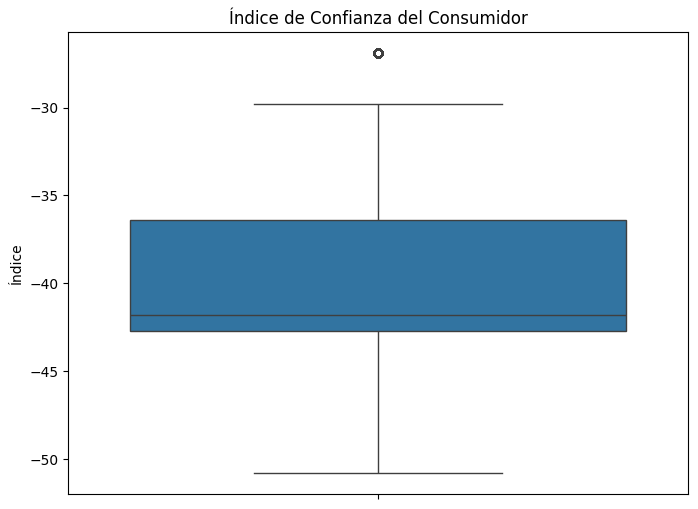

In [511]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=marketing, y='cons_conf_idx')
plt.title('Índice de Confianza del Consumidor')
plt.ylabel('Índice')
plt.show()

### Datos bancarios o financieros de clientes

In [531]:
marketing['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

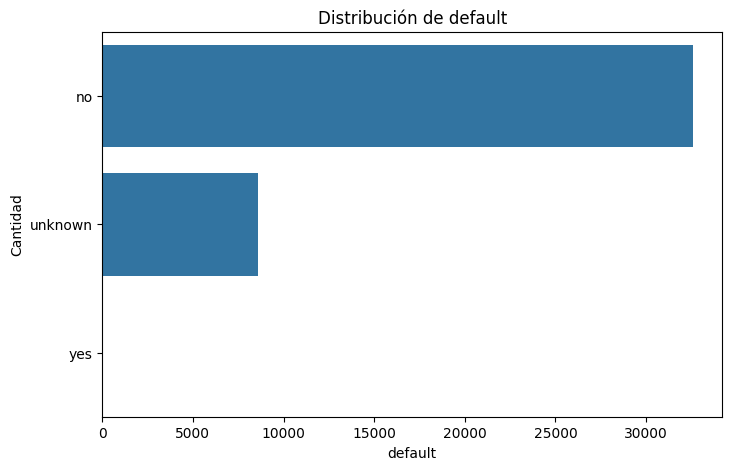

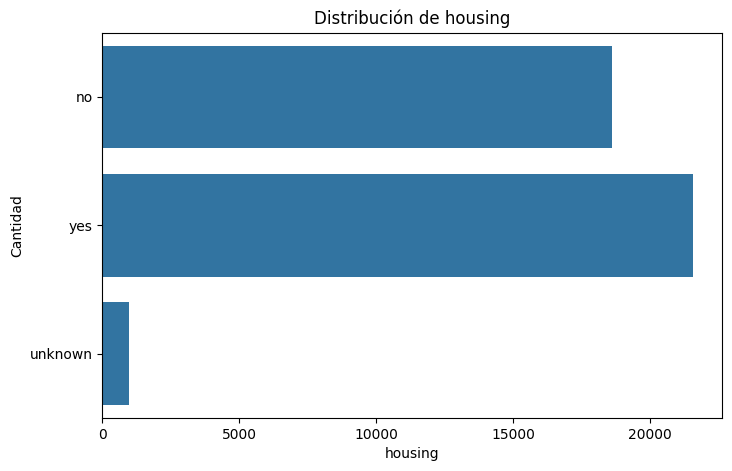

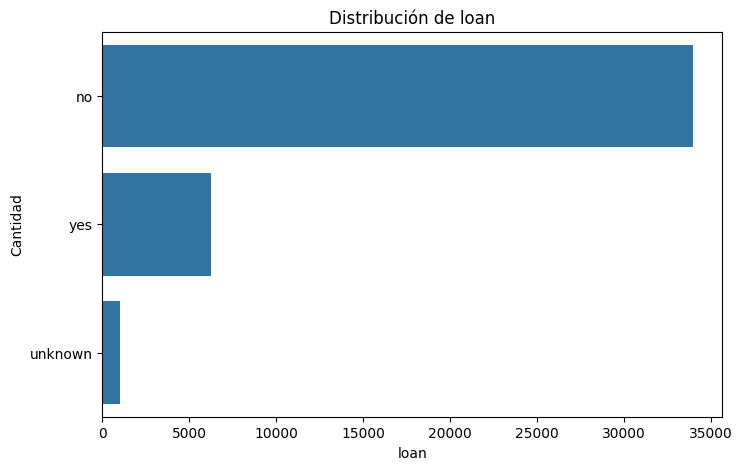

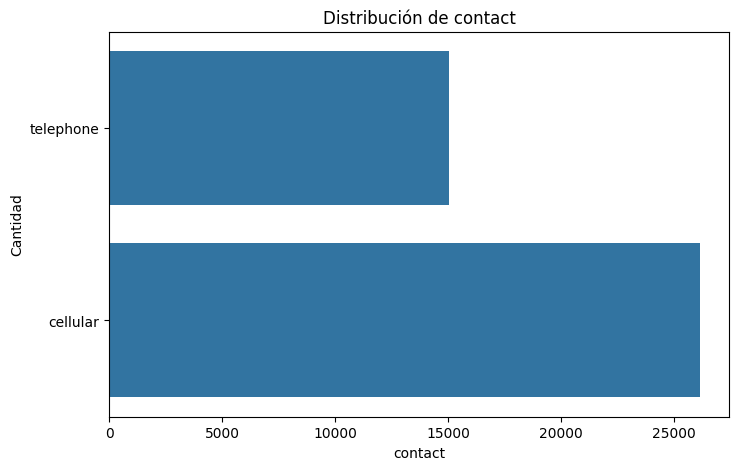

In [530]:
columnas = ['default', 'housing', 'loan', 'contact']

# Iterar sobre las columnas y crear gráficos de barras
for columna in columnas:
    plt.figure(figsize=(8, 5))
    sns.countplot(marketing[columna])
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad')
    plt.show()


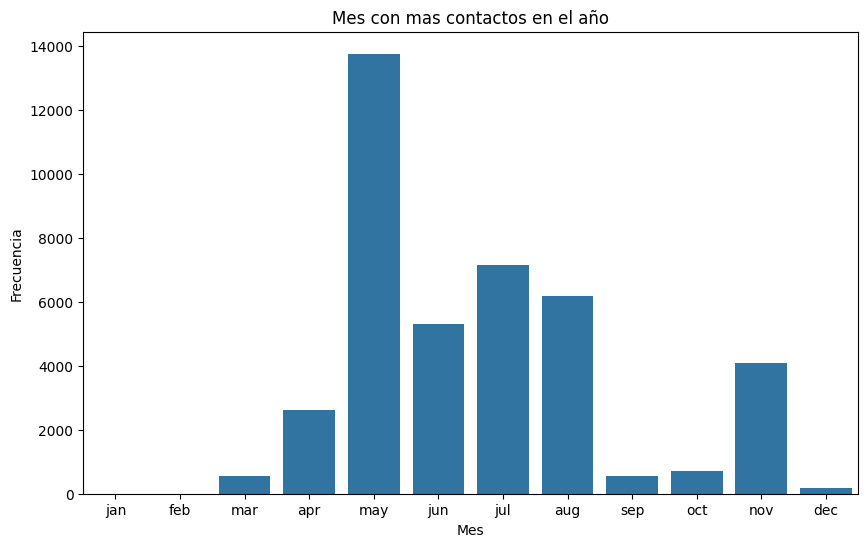

In [513]:
plt.figure(figsize=(10, 6))
sns.countplot(data=marketing, x='month', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Mes con mas contactos en el año')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

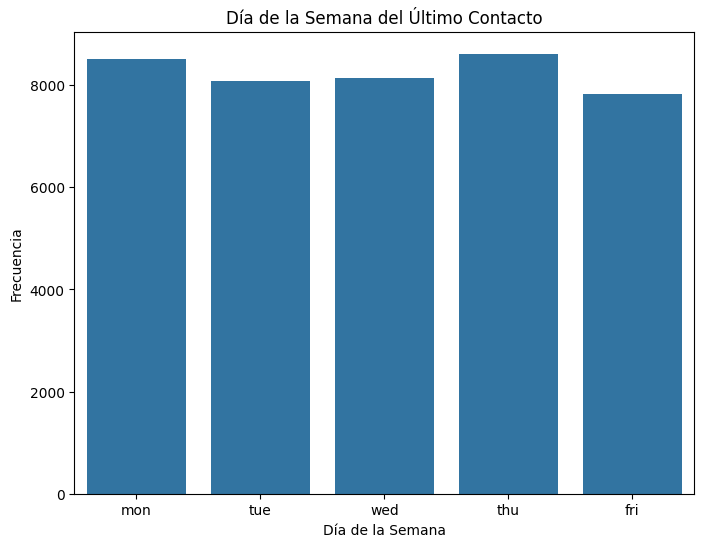

In [514]:
plt.figure(figsize=(8, 6))
sns.countplot(data=marketing, x='day_of_week', order=['mon', 'tue', 'wed', 'thu', 'fri'])
plt.title('Día de la Semana del Último Contacto')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

### Aceptacion del deposito a plazo

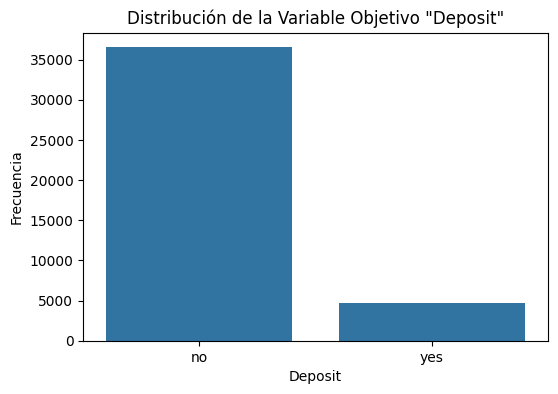

In [515]:
plt.figure(figsize=(6, 4))
sns.countplot(data=marketing, x='deposit')
plt.title('Distribución de la Variable Objetivo "Deposit"')
plt.xlabel('Deposit')
plt.ylabel('Frecuencia')
plt.show()

In [516]:
marketing['deposit'].value_counts()

deposit
no     36537
yes     4639
Name: count, dtype: int64

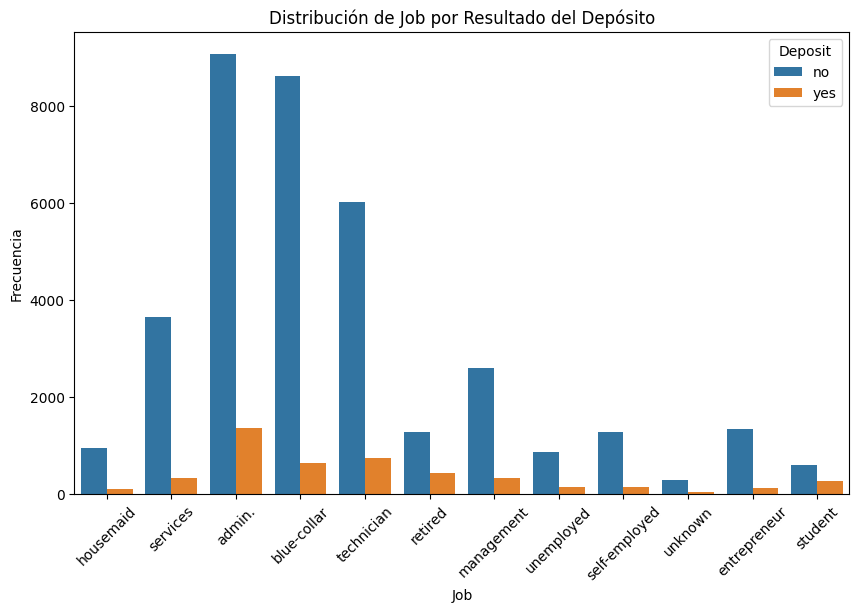

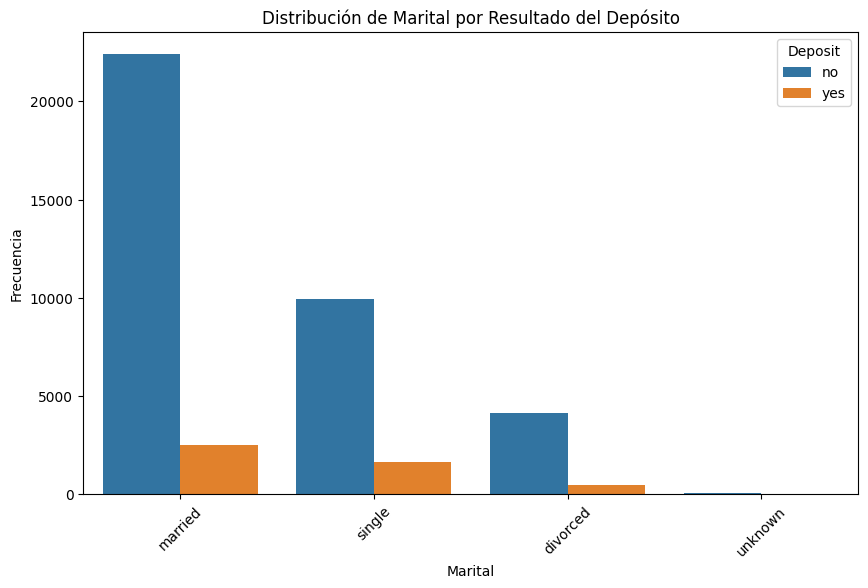

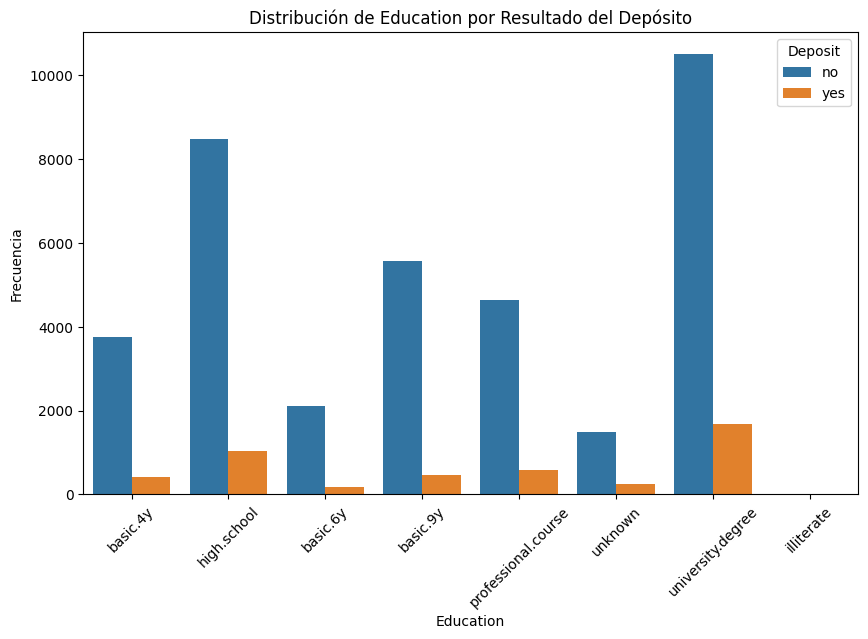

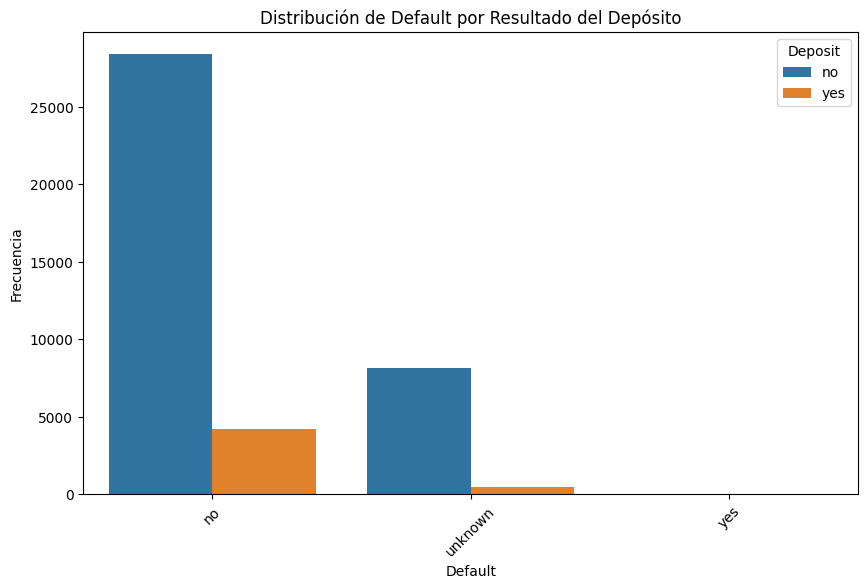

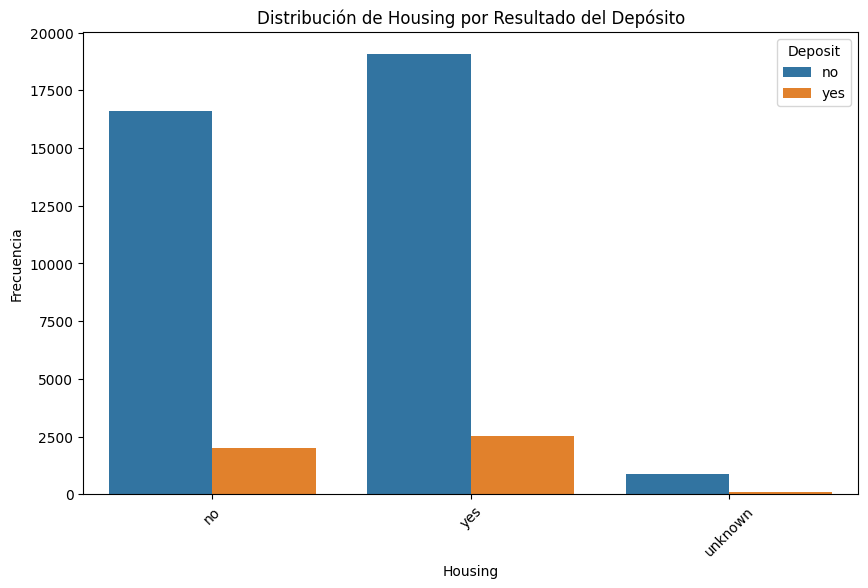

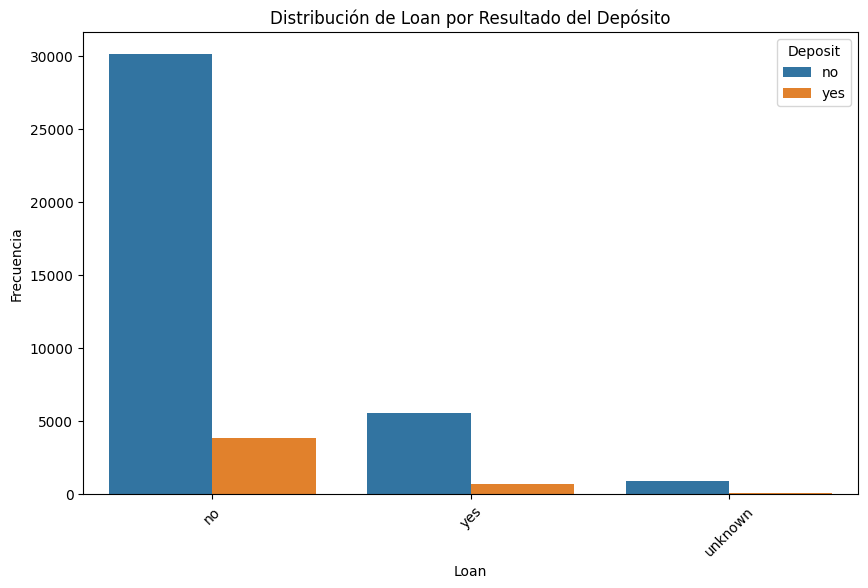

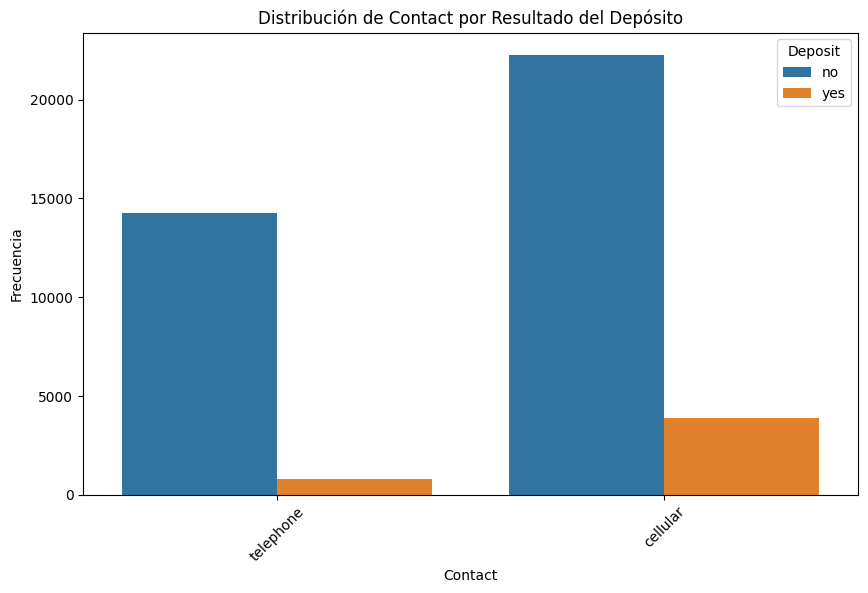

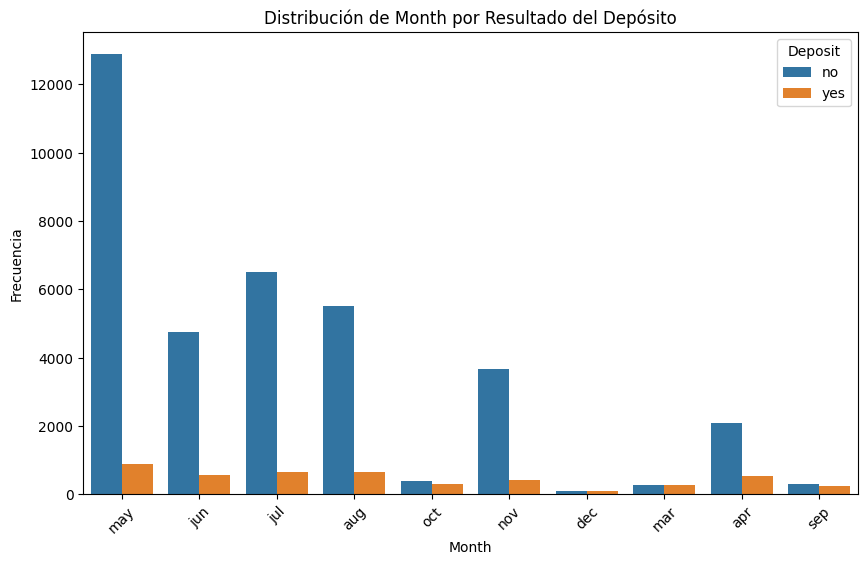

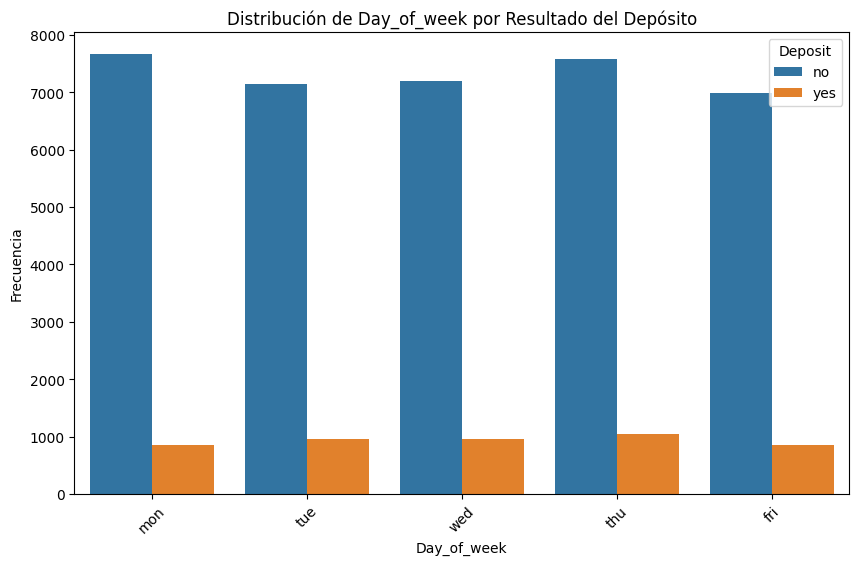

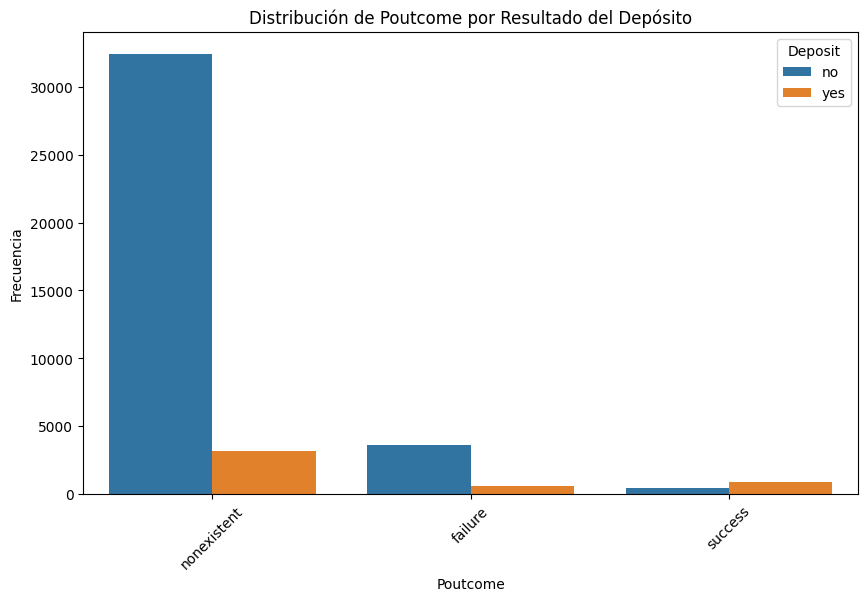

In [517]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=marketing, x=column, hue='deposit')
    plt.title(f'Distribución de {column.capitalize()} por Resultado del Depósito')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(title='Deposit')
    plt.show()

In [518]:
marketing.groupby('default').get_group('yes')['deposit'].value_counts()

deposit
no    3
Name: count, dtype: int64

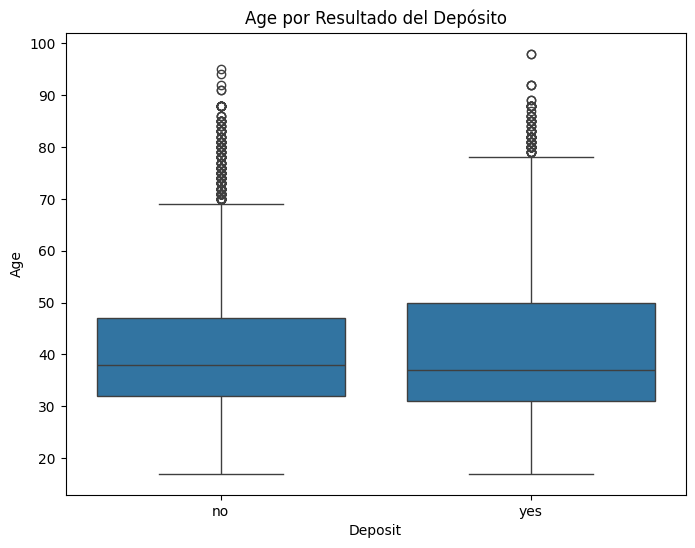

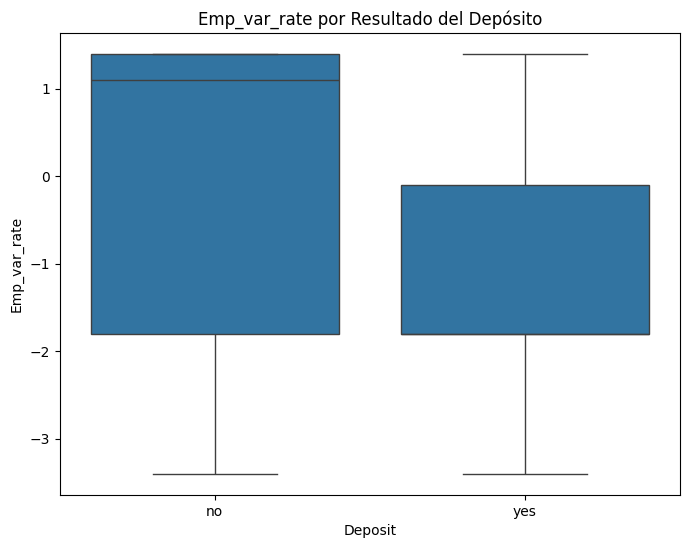

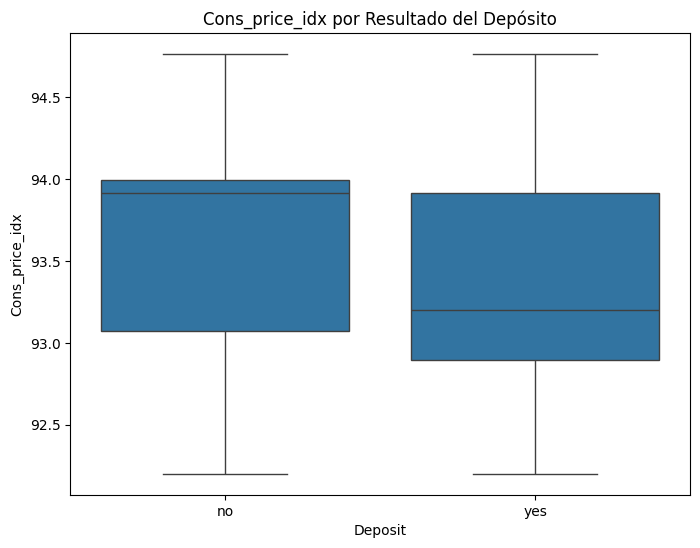

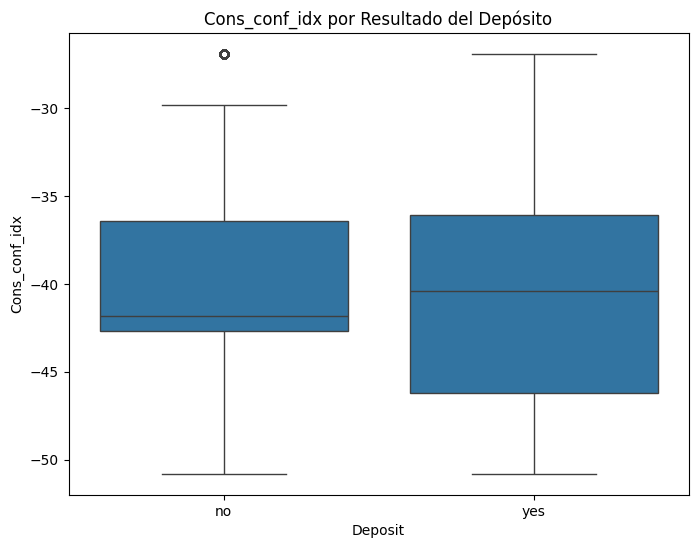

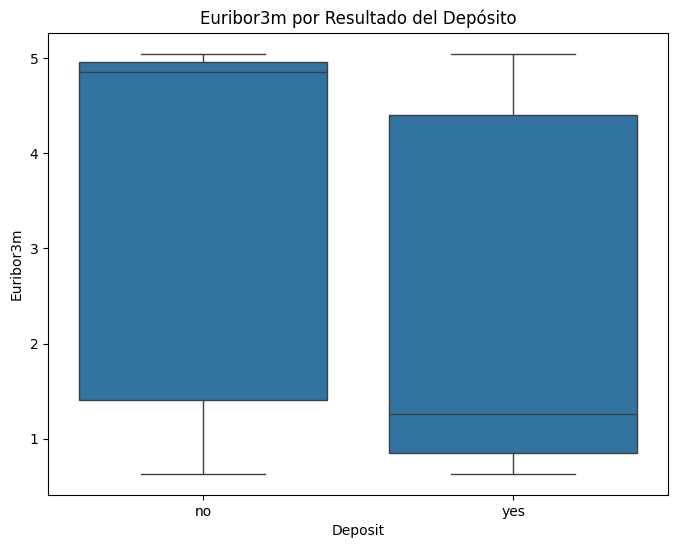

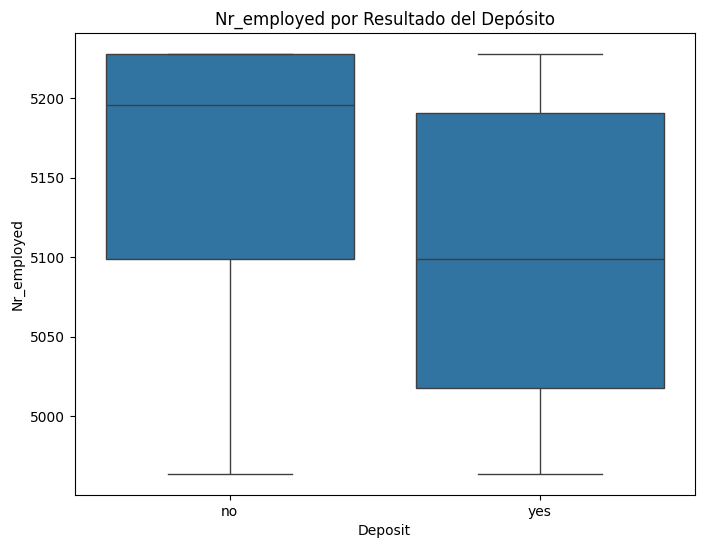

In [519]:
numeric_columns = ['age', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=marketing, x='deposit', y=column)
    plt.title(f'{column.capitalize()} por Resultado del Depósito')
    plt.xlabel('Deposit')
    plt.ylabel(column.capitalize())
    plt.show()

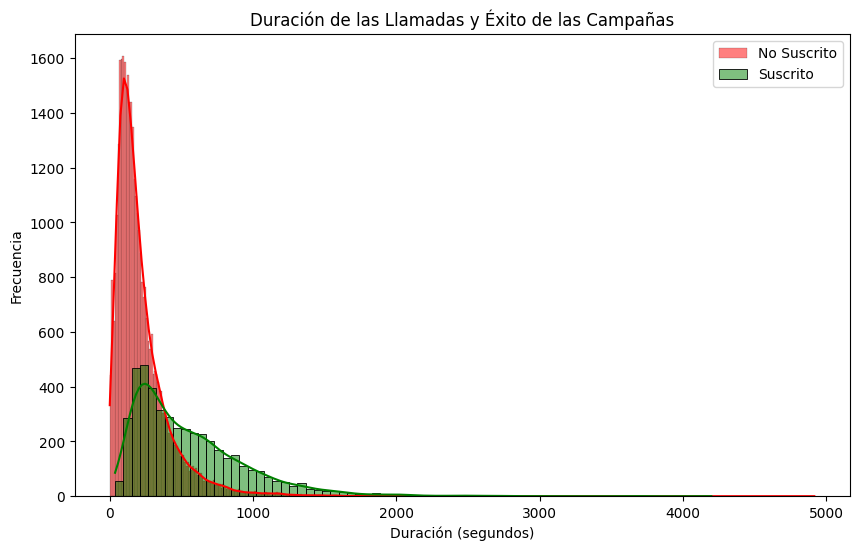

In [520]:
plt.figure(figsize=(10, 6))
sns.histplot(marketing[marketing['deposit'] == 'no']['duration'], kde=True, color='red', label='No Suscrito')
sns.histplot(marketing[marketing['deposit'] == 'yes']['duration'], kde=True, color='green', label='Suscrito')
plt.title('Duración de las Llamadas y Éxito de las Campañas')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

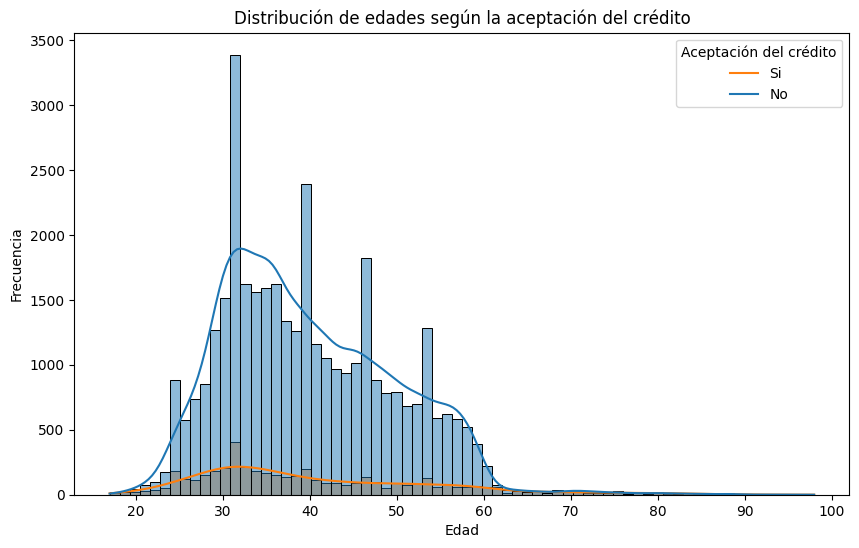

In [521]:
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing,bins=70, x='age', hue='deposit', kde=True)
plt.title('Distribución de edades según la aceptación del crédito')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Aceptación del crédito', labels=['Si', 'No'])
plt.show()

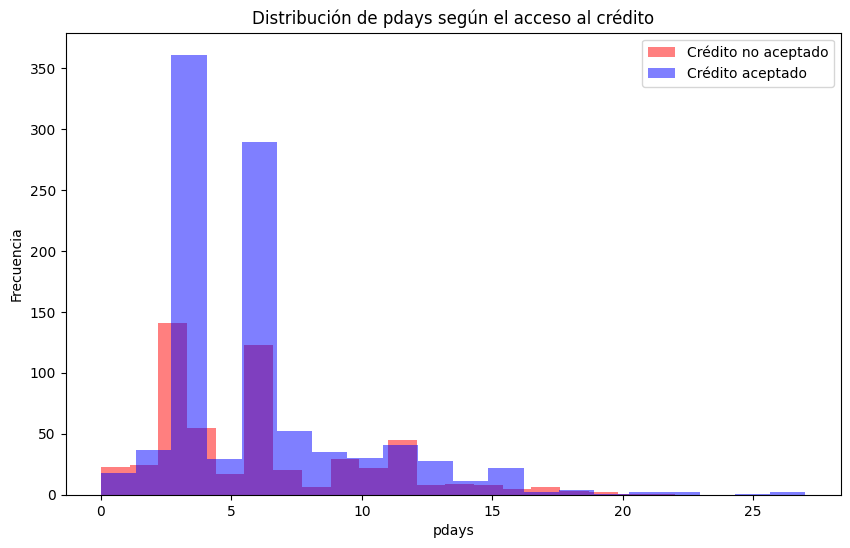

In [522]:
# Filtrar los datos excluyendo los valores de pdays iguales a -1
filtered_data = marketing[marketing['pdays'] != 999]

# Separar los datos en dos DataFrames: uno para los casos en que se ofreció el crédito y otro para los casos en que no se ofreció
credit_offered = filtered_data[filtered_data['deposit'] == 'yes']
credit_not_offered = filtered_data[filtered_data['deposit'] == 'no']

# Crear los histogramas para visualizar la distribución de pdays para cada caso
plt.figure(figsize=(10, 6))
plt.hist(credit_not_offered['pdays'], bins=20, alpha=0.5, color='red', label='Crédito no aceptado')
plt.hist(credit_offered['pdays'], bins=20, alpha=0.5, color='blue', label='Crédito aceptado')
plt.title('Distribución de pdays según el acceso al crédito')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [533]:
len(marketing[marketing['pdays'] != 999])

1515

In [523]:
marketing_2 = marketing.copy()
marketing_2 = marketing_2[marketing_2['pdays'] != 999]
marketing_2['deposit'].value_counts()

deposit
yes    967
no     548
Name: count, dtype: int64

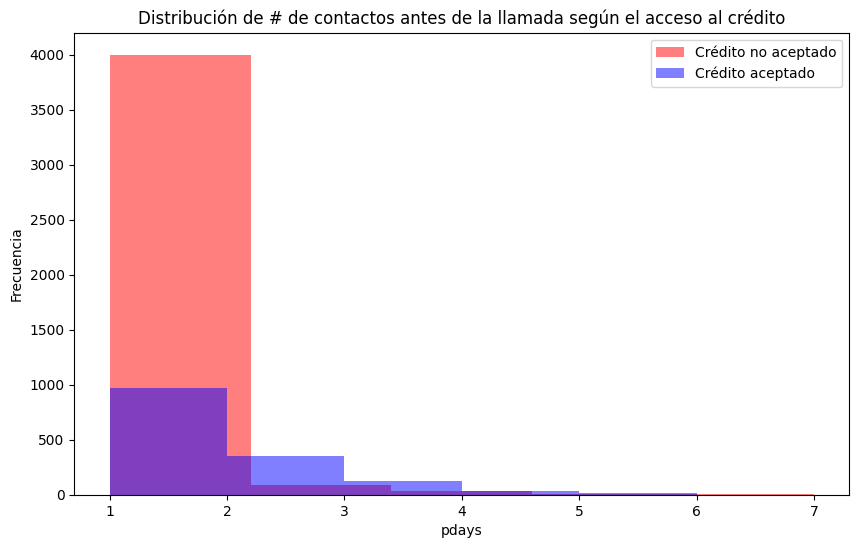

In [524]:
# Filtrar los datos excluyendo los valores de previous iguales a 0
filtered_data = marketing[marketing['previous'] != 0]

# Separar los datos en dos DataFrames: uno para los casos en que se ofreció el crédito y otro para los casos en que no se ofreció
credit_offered = filtered_data[filtered_data['deposit'] == 'yes']
credit_not_offered = filtered_data[filtered_data['deposit'] == 'no']
# Crear los histogramas para visualizar la distribución de pdays para cada caso
plt.figure(figsize=(10, 6))
plt.hist(credit_not_offered['previous'], bins=5, alpha=0.5, color='red', label='Crédito no aceptado')
plt.hist(credit_offered['previous'], bins=5, alpha=0.5, color='blue', label='Crédito aceptado')
plt.title('Distribución de # de contactos antes de la llamada según el acceso al crédito')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

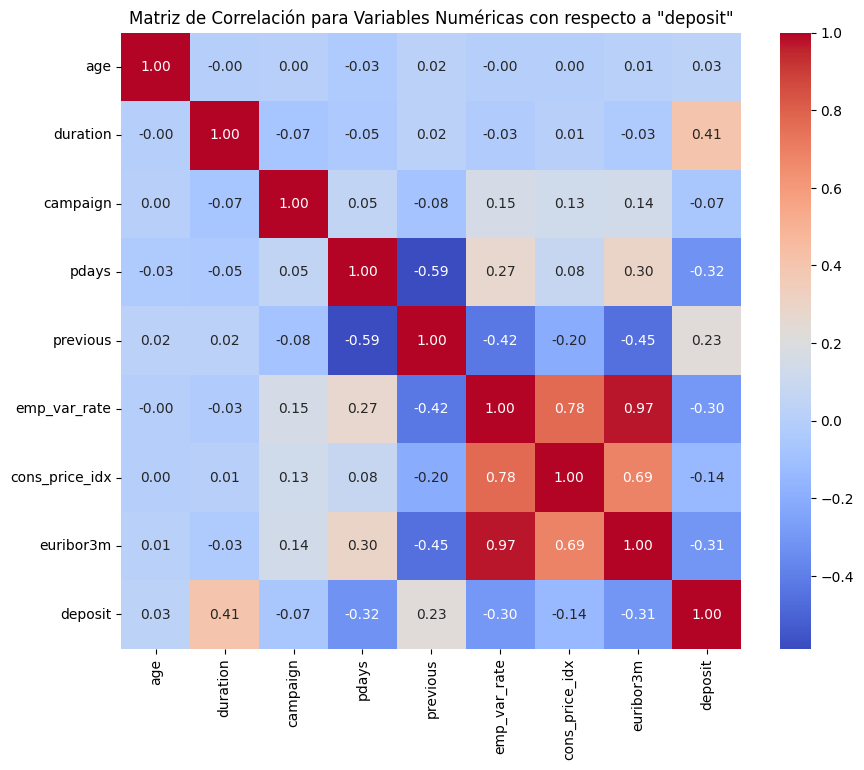

In [536]:
marketing['deposit'] = marketing['deposit'].map({'yes': 1, 'no': 0})

# Seleccionar las variables numéricas y la variable objetivo 'deposit'
variables_numericas = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'euribor3m']
analisis_numerico_marketing = marketing[variables_numericas + ['deposit']]

# Calcular la matriz de correlación
correlation_matrix = analisis_numerico_marketing.corr()

# Trazar el mapa de calor de la matriz de correlación extendida
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Numéricas con respecto a "deposit"')
plt.show()


In [526]:
analisis_numerico_marketing.describe().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,euribor3m
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,3.62
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,1.73
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,0.63
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,1.34
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,4.86
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,4.96
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,5.04
